# Fazendo recomendações

Sistemas de recomendação é um campo que tem grande destaque acadêmico, seu impacto comercial é ainda mais significativo. Esses sistemas são amplamente utilizados em plataformas de compras online, sites de streaming de filmes e aplicativos de entrega de comida. Eles sugerem produtos, filmes ou restaurantes que possam ser do interesse do usuário, desempenhando um papel crucial nas vendas de muitas empresas.

Um exemplo prático da aplicação desses sistemas é na previsão de avaliações de filmes em um site de streaming. Imagine um cenário onde os usuários classificam filmes com uma a cinco estrelas. Por exemplo, temos quatro usuários: Alice, Bob, Carol e Dave, e cinco filmes. Alice avaliou o filme "Love at Last" com cinco estrelas e "Romance Forever" também com cinco estrelas, mas não assistiu a "Cute Puppies of Love", então não há avaliação, representada por um ponto de interrogação.

Neste sistema, definimos duas variáveis importantes: uma que indica se um usuário avaliou um filme específico (`r(i,j)=1` se o usuário `j` avaliou o filme `i`, e `0` caso contrário) e outra que registra a nota dada (`y(i,j)` representa a nota que o usuário `j` deu para o filme `i`). Esse modelo nos permite identificar filmes não avaliados pelos usuários e tentar prever como eles poderiam classificá-los, com o objetivo de fazer recomendações mais assertivas que provavelmente receberão avaliações altas.

# Usando recursos por item

Para desenvolver um sistema de recomendação que utilize características específicas de cada item, como no caso de filmes, podemos considerar essas características como parte integrante do processo de previsão. Imagine que temos dois atributos para cada filme: quanto ele é romântico (X1) e quanto ele é de ação (X2). Por exemplo, o filme "Love at Last" tem alta pontuação em romance (0.9) e nenhuma em ação (0.0), enquanto "Nonstop Car Chases" possui um pouco de romance (0.1) e alta pontuação em ação (1.0).

Com essas características, é possível aplicar um modelo de previsão similar à regressão linear para cada usuário individualmente. Neste contexto, o número de usuários é denotado por `nu` e o número de filmes por `m`. Além disso, `n` representa o número de características, que no nosso caso é 2 (X1 e X2).

Para fazer previsões específicas, consideremos Alice como exemplo. A previsão da avaliação que Alice daria para um filme pode ser calculada usando a fórmula `w.X(i)+b`, onde `w` é um vetor de pesos que indica a importância de cada característica do filme para Alice, e `b` é um viés. Suponha que escolhemos os parâmetros `w(1)=[5,0]` e `b(1)=0` para Alice. Isso significa que Alice valoriza muito o aspecto romântico dos filmes e não dá importância para o aspecto de ação. Assim, para o filme "Cute Puppies of Love", que é quase totalmente romântico (0.99 em romance e 0 em ação), a previsão de avaliação seria de aproximadamente 4.95, o que é consistente com as altas avaliações que Alice deu para outros filmes românticos.

Essa abordagem é personalizada para cada usuário, adicionando um superíndice aos parâmetros `w` e `b` (por exemplo, `w(1)` e `b(1)` para Alice), para refletir que cada usuário tem seu próprio conjunto de parâmetros. O mesmo modelo pode ser estendido para outros usuários (`w(j).X(i)+b(j)`), permitindo que o sistema adapte suas previsões às preferências individuais de cada um baseando-se nas características dos filmes.

Este método oferece uma maneira flexível e robusta de prever como os usuários avaliarão filmes que ainda não viram, baseando-se em suas avaliações anteriores e nas características dos filmes, facilitando recomendações personalizadas que têm maior probabilidade de serem bem recebidas.

Para otimizar nosso sistema de recomendação, precisamos definir uma função de custo que nos ajudará a aprender os melhores parâmetros para prever as avaliações dos filmes pelos usuários. Neste caso, utilizamos uma abordagem semelhante à da regressão linear, focando em minimizar o erro quadrático médio entre as avaliações previstas e as avaliações reais.

Vamos considerar um usuário específico, denominado usuário `j`. A função de custo será calculada com base nas diferenças entre as avaliações previstas pelo modelo, `w(j).X(i)+b(j)`, e as avaliações reais, `y(i,j)`, para cada filme `i` que o usuário `j` avaliou. O erro quadrado dessas diferenças será somado apenas para os filmes que o usuário realmente avaliou, conforme indicado por `r(i,j)=1`.

A fórmula para a função de custo `J` para o usuário `j` é expressa como:

$$ J(w(j), b(j)) = \frac{1}{2m(j)} \sum_{\{i \mid r(i,j)=1\}} \left( w(j).X(i) + b(j) - y(i,j) \right)^2 $$

Aqui, `m(j)` é o número de filmes que o usuário `j` avaliou. Esta normalização é comum em regressão linear e serve para ajustar a escala do erro, considerando o número de pontos de dados (avaliações).

Para evitar o sobreajuste do modelo aos dados de treinamento, introduzimos um termo de regularização na função de custo, que penaliza valores grandes nos parâmetros `w(j)`. O termo de regularização é definido como:

$$ \text{Regularização} = \frac{\lambda}{2m(j)} \sum \left( w(j) \right)^2 $$

Onde `\lambda` é um parâmetro que controla a força da regularização.

A função de custo completa para o usuário `j`, incluindo o termo de regularização, torna-se:

$$ J(w(j), b(j)) = \frac{1}{2m(j)} \sum_{\{i \mid r(i,j)=1\}} \left( w(j).X(i) + b(j) - y(i,j) \right)^2 + \frac{\lambda}{2m(j)} \sum \left( w(j) \right)^2 $$

Embora `m(j)` seja uma constante que poderia ser eliminada para simplificação, mantê-la ajuda a manter a escala da função de custo consistente, especialmente quando comparamos usuários com diferentes números de avaliações.

Para aprender os parâmetros para todos os usuários, somamos a função de custo de cada usuário `j` de `1` a `nu`, onde `nu` é o número total de usuários:

$$ J_{total} = \sum_{j=1}^{nu} J(w(j), b(j)) $$

Minimizando esta função de custo agregada com um algoritmo de otimização como o gradiente descendente, aprendemos os parâmetros `w(1), b(1)`, ..., `w(nu), b(nu)` que melhor predizem as avaliações dos filmes para todos os usuários no sistema.

Este método trata cada usuário individualmente, ajustando um modelo de regressão linear para suas avaliações, e é escalado para todos os usuários através da soma das funções de custo individuais. Com essa abordagem, podemos ajustar o sistema para capturar as preferências únicas de cada usuário com base nas características dos filmes que eles avaliam.

# Algoritmo de filtragem colaborativa

No contexto de sistemas de recomendação, quando não temos características predefinidas dos itens, como os filmes, podemos aprender essas características a partir dos dados de avaliação dos usuários. Suponha que inicialmente não sabemos quais são as características que definem o quão romântico ou cheio de ação um filme é. Nesse caso, podemos utilizar uma abordagem chamada filtragem colaborativa para inferir essas características.

Imagine que temos avaliações de quatro usuários para vários filmes, mas não temos informações explícitas sobre as características desses filmes. No entanto, já determinamos certos parâmetros para esses usuários, que descrevem como suas avaliações são influenciadas por características hipotéticas dos filmes. Por exemplo, um usuário pode dar mais peso à característica de romance, enquanto outro dá mais peso à de ação.

Se esses parâmetros já foram aprendidos (por exemplo, um usuário dá peso 5 para romance e 0 para ação), podemos usar essas informações para tentar descobrir as características dos filmes. Por exemplo, se um filme foi altamente avaliado por um usuário que valoriza romance, mas não por aqueles que valorizam ação, isso sugere que o filme é muito romântico e pouco ação.

Utilizando as avaliações e os parâmetros dos usuários, podemos formular um sistema de equações onde o produto entre os parâmetros do usuário e as características hipotéticas do filme resulta na avaliação dada. Ajustando essas características para minimizar as diferenças entre as avaliações previstas e as reais, chegamos a um vetor de características para cada filme.

A função de custo nesse cenário pode ser uma soma dos erros quadrados entre as avaliações observadas e as previstas, semelhante à regressão linear. No entanto, a complexidade aqui é maior porque estamos tentando aprender simultaneamente sobre as características dos filmes com base nas interações de múltiplos usuários, cada um com seus próprios parâmetros de preferência.

Essa abordagem não só permite prever avaliações para filmes já avaliados, como também fornece uma base para prever como esses usuários avaliariam outros filmes, com base nas características inferidas. Dessa forma, mesmo sem informações explícitas sobre os filmes, ainda é possível personalizar recomendações e entender melhor as preferências dos usuários.

Para aprender as características dos filmes em um sistema de recomendação, especialmente quando essas características não são previamente conhecidas, podemos definir uma função de custo que nos permite inferir essas características com base nas avaliações dos usuários. Esse processo é parte de uma técnica conhecida como filtragem colaborativa.

A ideia é minimizar o erro quadrático entre as avaliações previstas e as avaliações reais dos usuários. Para um filme específico `i`, definimos a função de custo que ajusta as características desse filme (`x^i`). A previsão da avaliação que o usuário `j` dá ao filme `i` é modelada como um produto escalar entre os parâmetros de preferência do usuário (`w^j`) e as características do filme (`x^i`), adicionando o viés (`b^j`).

A função de custo para as características de um filme específico pode ser expressa como:

$$ J(x^i) = \sum_{j \text{ onde } r(i,j) = 1} \left( w^j \cdot x^i + b^j - y_{i,j} \right)^2 $$

Aqui, `r(i,j) = 1` indica que o usuário `j` avaliou o filme `i`. O objetivo é minimizar essa soma de erros quadrados, ajustando as características do filme `x^i` de tal maneira que as previsões de avaliações se alinhem tão perto quanto possível das avaliações reais.

Para controlar a complexidade do modelo e evitar sobreajuste, adicionamos um termo de regularização à função de custo. Esse termo penaliza os valores grandes das características do filme, mantendo-as tão pequenas quanto possível. A regularização é expressa como:

$$ \lambda \sum_{k=1}^{n} (x^i_k)^2 $$

Onde `n` é o número de características, e `\lambda` é o parâmetro de regularização que controla o equilíbrio entre o ajuste dos dados e a complexidade do modelo.

Para aprender as características de todos os filmes no conjunto de dados, somamos as funções de custo individuais de cada filme:

$$ J_{\text{total}} = \sum_{i=1}^{n_m} J(x^i) $$

Onde `n_m` é o número total de filmes.

Minimizando essa função de custo agregada, usando um algoritmo como o gradiente descendente, podemos inferir um conjunto robusto de características para todos os filmes no conjunto de dados. Isso permite que o sistema faça previsões precisas de avaliações para filmes não avaliados pelos usuários, baseando-se nas características aprendidas dos filmes que já foram avaliados.

Ao integrar as abordagens de aprendizagem dos parâmetros dos usuários ($w$ e $b$) e das características dos filmes ($x$), construímos o algoritmo de filtragem colaborativa completo. Este algoritmo é projetado para aprender simultaneamente os parâmetros que melhor descrevem tanto os usuários quanto os filmes, a partir das avaliações fornecidas.

A função de custo final combina os elementos que aprendem os pesos e viés dos usuários com os que inferem as características dos filmes. Ela é formulada de maneira a minimizar o erro quadrático entre as avaliações previstas e as avaliações reais, considerando todas as avaliações existentes no conjunto de dados.

**A função de custo combinada** é expressa como:

$$ J(w, b, x) = \sum_{\{(i, j) \mid r_{i,j} = 1\}} \left( w^j \cdot x^i + b^j - y_{i,j} \right)^2 + \lambda \sum (w^j)^2 + \lambda \sum (x^i)^2 $$

Aqui, a primeira parte da função de custo corresponde ao erro quadrado das previsões, a segunda parte é o termo de regularização para os parâmetros dos usuários, e a terceira parte é o termo de regularização para as características dos filmes. A regularização ajuda a evitar o sobreajuste ao penalizar valores grandes para $w$ e $x$, mantendo o modelo geralmente aplicável e robusto.

### Processo de Otimização

Para minimizar esta função de custo:

1. **Inicialização**: Começamos com valores iniciais para $w$, $b$, e $x$.
2. **Cálculo do Gradiente**: Calculamos os gradientes da função de custo em relação a cada conjunto de parâmetros ($w$, $b$, e $x$).
3. **Atualização dos Parâmetros**: Utilizamos um algoritmo de otimização, como o gradiente descendente, para ajustar os parâmetros na direção que minimiza a função de custo.
4. **Repetição**: Este processo é repetido iterativamente até que a função de custo convirja para um mínimo ou até que se atinja um número predeterminado de iterações.

### Implicações do Algoritmo

Esta abordagem tem várias vantagens:

- **Adaptabilidade**: Ao aprender tanto as características dos filmes quanto os parâmetros dos usuários, o sistema pode se adaptar a novos usuários e filmes de maneira eficaz.
- **Personalização**: A modelagem individual dos gostos dos usuários e das características dos filmes permite recomendações altamente personalizadas.
- **Flexibilidade**: O modelo pode ser aplicado a qualquer tipo de item ou usuário, desde que haja dados de avaliação suficientes.

Para minimizar a função de custo no contexto da filtragem colaborativa, que inclui parâmetros para usuários (w e b) e características dos filmes (x), utilizamos uma técnica de otimização conhecida como gradiente descendente. Esta abordagem é essencial para ajustar simultaneamente todos esses parâmetros a fim de melhorar a precisão das previsões do sistema de recomendação.

### Implementação do Gradiente Descendente

O gradiente descendente funciona iterativamente ajustando os parâmetros para minimizar a função de custo, calculando o gradiente da função de custo com relação a cada parâmetro e atualizando os parâmetros na direção oposta ao gradiente. O processo é descrito em etapas simples:

1. **Inicialização**: Primeiro, inicializamos os parâmetros $w$, $b$, e $x$ com valores aleatórios ou baseados em alguma heurística.
   
2. **Cálculo do Gradiente**: Em cada iteração, calculamos os gradientes da função de custo com relação a cada parâmetro. Isso envolve derivadas parciais da função de custo com respeito a cada $w$, cada $b$, e cada $x$. 
   - Para $w$, a derivada parcial será relacionada ao impacto de cada característica do usuário na previsão.
   - Para $b$, é basicamente o ajuste que não depende das características.
   - Para $x$, o gradiente reflete como as características do filme contribuem para a discrepância entre as avaliações previstas e reais.

3. **Atualização dos Parâmetros**: Após calcular os gradientes, atualizamos cada parâmetro subtraindo um produto do gradiente pelo tamanho do passo de aprendizagem (taxa de aprendizagem). Este passo é crucial para mover os parâmetros na direção que reduz o erro:
   $$
   w := w - \alpha \frac{\partial J}{\partial w}, \quad b := b - \alpha \frac{\partial J}{\partial b}, \quad x := x - \alpha \frac{\partial J}{\partial x}
   $$
   Onde $\alpha$ é a taxa de aprendizagem, que determina o tamanho do passo em cada atualização.

4. **Repetição**: Repetimos o processo de cálculo do gradiente e atualização dos parâmetros até que a função de custo convirja para um mínimo ou até que um número máximo de iterações seja alcançado.

### Considerações Finais

Ao aplicar gradiente descendente no contexto de filtragem colaborativa, lidamos com a complexidade adicional de otimizar simultaneamente sobre um grande número de parâmetros. A eficiência do processo pode ser influenciada pela escolha da taxa de aprendizagem e pelo método de inicialização dos parâmetros. Ademais, a regularização integrada na função de custo ajuda a evitar o sobreajuste, mantendo as características dos filmes e os parâmetros dos usuários razoavelmente generalizáveis.

# Rótulos binários: favoritos, curtidas e cliques

Nos sistemas de recomendação com rótulos binários, em vez de usuários atribuírem notas de um a cinco estrelas a itens, eles simplesmente indicam se gostaram ou não de um item específico. Este modelo binário é uma simplificação do modelo de classificação mais complexo e é útil em várias aplicações práticas.

### Generalização do Algoritmo de Filtragem Colaborativa para Rótulos Binários

Para adaptar o algoritmo de filtragem colaborativa para trabalhar com rótulos binários, podemos recorrer a uma abordagem semelhante à transição da regressão linear para a regressão logística, que é usada para prever rótulos binários (por exemplo, gostei/não gostei) em vez de valores contínuos.

#### Exemplos de Rótulos Binários:

1. **Sites de Compras Online**: Um rótulo '1' pode indicar que o usuário comprou um item após visualizá-lo, enquanto '0' indica que não comprou. Um '?' indica que o item não foi mostrado ao usuário.

2. **Redes Sociais**: '1' pode representar que o usuário marcou um item como favorito ou gostou dele após visualização, e '0' que não marcou como favorito ou não gostou. Um '?' seria usado para itens que ainda não foram apresentados ao usuário.

3. **Comportamento do Usuário**: Em vez de pedir avaliações explícitas, muitos sites analisam o comportamento do usuário para inferir se gostaram de um item. Por exemplo, se um usuário passa pelo menos 30 segundos em um item, isso pode ser interpretado como um '1', indicando engajamento. Se o usuário não passar esse tempo mínimo, recebe um '0', indicando desengajamento. Um '?' seria usado para itens que o usuário ainda não viu.

4. **Publicidade Online**: Se um usuário clicar em um anúncio, isso pode ser registrado como '1', e se não clicar, como '0'. Um '?' indica que o anúncio ainda não foi mostrado ao usuário.

### Implementação do Algoritmo:

Para implementar a filtragem colaborativa com rótulos binários, ajustamos o modelo para usar a função logística para prever a probabilidade de um usuário gostar de um item. Os passos incluem:

1. **Modelagem da Probabilidade**: Usamos a função logística $ \sigma(x) = \frac{1}{1 + e^{-x}} $ para modelar a probabilidade de um usuário gostar de um item com base nas características do usuário e do item.

2. **Função de Custo**: Adaptamos a função de custo para maximizar a verossimilhança dos rótulos observados, típico em problemas de classificação.

3. **Otimização**: Aplicamos algoritmos de otimização, como gradiente descendente, para aprender os parâmetros do modelo que maximizam a correspondência entre as previsões do modelo e os rótulos reais.

4. **Avaliação e Ajuste**: Avaliamos o desempenho do modelo e ajustamos conforme necessário para melhorar a precisão das previsões.


### Adaptação para Regressão Logística

No contexto de rótulos binários em sistemas de recomendação:

1. **Modelagem da Probabilidade**: Em vez de prever diretamente o rótulo `y_ij` como uma combinação linear dos atributos `x_i` e parâmetros `w_j` mais o viés `b`, como na regressão linear (`y_ij = w_j.x_i + b`), usamos a função logística para prever a probabilidade de `y_ij = 1`. A função logística é definida como:
   
   $$
   g(z) = \frac{1}{1 + e^{-z}}
   $$

   Onde `z = w_j.x_i + b`. Assim, a probabilidade de o usuário `j` gostar do item `i` é modelada como `g(w_j.x_i + b)`.

2. **Função de Custo**: Com rótulos binários, a função de custo de erro quadrático da regressão linear não é adequada. Em vez disso, adotamos a função de custo de entropia cruzada binária, que é mais adequada para resultados binários. A entropia cruzada binária para uma única instância é dada por:

   $$
   \text{Loss} = -y_{ij} \log(f(x)) - (1 - y_{ij}) \log(1 - f(x))
   $$

   Onde `f(x) = g(w_j.x_i + b)` é a predição do modelo.

3. **Sumarização da Função de Custo**: No modelo de filtragem colaborativa com rótulos binários, somamos a perda de entropia cruzada para todas as instâncias onde há um rótulo, ou seja, para todos os pares `i, j` onde `r_{ij} = 1`. A função de custo global para o modelo seria então:

   $$
   J(w, b, x) = \sum_{\{(i, j) | r_{ij} = 1\}} \left( -y_{ij} \log(g(w_j.x_i + b)) - (1 - y_{ij}) \log(1 - g(w_j.x_i + b)) \right)
   $$

### Otimização do Modelo

Para otimizar os parâmetros do modelo (`w`, `b`, e `x`), utilizamos técnicas de gradiente descendente, atualizando cada parâmetro na direção que minimiza a função de custo. Isso envolve calcular os gradientes da função de custo em relação a cada parâmetro e fazer ajustes iterativos.

### Implementação Prática

Ao implementar esse modelo em um sistema real, é crucial monitorar a convergência do modelo durante o treinamento, ajustar a taxa de aprendizagem para evitar oscilações ou convergência muito lenta, e validar a precisão do modelo em um conjunto de dados de teste para garantir que o modelo generaliza bem para novos dados.

# Normalização média

A normalização média é uma técnica utilizada em sistemas de recomendação, particularmente útil quando lidamos com avaliações, como as de filmes, que variam de zero a cinco estrelas. Essa abordagem ajusta os dados de avaliação para terem uma média consistente, o que pode melhorar significativamente a eficiência e a eficácia do algoritmo, especialmente ao lidar com novos usuários que ainda não fizeram avaliações.

### Explicação da Normalização Média

#### O Problema com Novos Usuários

Consideremos o caso de um novo usuário, como "Eve", que ainda não avaliou nenhum filme. Em um sistema de filtragem colaborativa típico, se os parâmetros não forem ajustados corretamente, o modelo pode acabar predizendo que Eve avaliará todos os filmes com zero estrelas, uma vez que seus parâmetros de peso (w) e viés (b) poderiam ser inicializados ou convergir para zero devido à falta de dados de avaliação para esse usuário. Isso acontece porque a função de custo tenta minimizar os parâmetros de peso quando não há avaliações para contribuir para o erro quadrado do modelo.

#### Implementação da Normalização Média

Para implementar a normalização média, primeiro calculamos a média de todas as avaliações conhecidas para cada filme no conjunto de dados. Em seguida, ajustamos cada avaliação subtraindo essa média. Isso centraliza os dados ao redor de zero, mas, mais importante, cria um ponto de referência uniforme para todas as avaliações. Isso é especialmente útil para usuários novos ou para aqueles que têm poucas avaliações, pois o modelo pode usar a média ajustada para fazer previsões mais informadas, em vez de recorrer a uma previsão padrão não informativa de zero.

#### Vantagens da Normalização Média

1. **Previsões Melhores para Novos Usuários**: Ao centralizar as avaliações em torno de uma média comum, o sistema pode fazer previsões mais razoáveis para novos usuários, baseando-se na média geral de avaliações dos filmes, em vez de assumir a ausência de preferência (zero estrelas).

2. **Redução de Viés**: Isso ajuda a mitigar o viés introduzido por usuários que avaliam filmes muito rigorosamente ou muito generosamente comparados à média.

3. **Melhoria na Convergência do Algoritmo**: Algoritmos como o gradiente descendente tendem a convergir mais rapidamente quando os dados estão normalizados, porque a normalização ajuda a evitar disparidades grandes nas escalas de avaliação entre diferentes usuários ou filmes.

### Passo a Passo da Normalização Média

1. **Cálculo da Média de Avaliações**:
   - Para cada filme no conjunto de dados, calcule a média das avaliações que ele recebeu, excluindo quaisquer avaliações ausentes (representadas por '?').
   - Por exemplo, se um filme recebeu avaliações de 5, 5, 0 e 0, sua média seria 2,5.

2. **Subtração da Média**:
   - Subtraia a média calculada de cada avaliação individual do filme correspondente. Isso ajusta todas as avaliações para que oscilem em torno de zero, com valores positivos indicando uma avaliação acima da média e valores negativos, abaixo da média.
   - Ajuste a avaliação do filme com média 2,5 de uma avaliação original de 5 para 2,5 (5 - 2,5).

3. **Adaptação dos Parâmetros de Predição**:
   - No modelo de filtragem colaborativa, ao fazer predições após a normalização média, é crucial adicionar de volta a média subtraída para garantir que as previsões de avaliações sejam realizadas na escala original (de 0 a 5 estrelas).
   - Por exemplo, se a previsão para um usuário resultar em 0 (devido à falta de avaliações prévias), ao adicionar a média, ajusta-se a previsão para o valor médio das avaliações do filme, proporcionando uma estimativa mais informativa e realista.

### Vantagens para Novos Usuários e Filmes

- **Novos Usuários**: Para um usuário que não avaliou nenhum filme, aplicar a normalização média permite que o sistema faça previsões baseadas nas médias de avaliações dos filmes. Isso é mais razoável do que simplesmente presumir que ela avaliaria todos os filmes com zero estrelas.
- **Novos Filmes**: Embora a normalização das colunas (médias dos usuários) também possa ser útil, é mais crítico normalizar as linhas (médias dos filmes) para dar previsões razoáveis para usuários novos. Normalizar as colunas poderia ajudar se um filme completamente novo fosse adicionado ao sistema, mas esses casos são menos comuns e requerem cautela antes de expor o filme a muitos usuários.

# Implementação do TensorFlow de filtragem colaborativa

O TensorFlow é uma ferramenta poderosa não apenas para construir redes neurais, mas também para implementar algoritmos de aprendizado de máquina, como a filtragem colaborativa. Uma das grandes vantagens de usar TensorFlow é sua capacidade de automatizar o cálculo de derivadas, o que facilita significativamente a implementação de algoritmos que requerem descida de gradiente.

### Implementação de Filtragem Colaborativa com TensorFlow

#### Definição da Função de Custo

A filtragem colaborativa envolve a previsão de preferências de usuário baseando-se em avaliações anteriores. No TensorFlow, você começa definindo a função de custo que deseja minimizar. Em um cenário de filtragem colaborativa, essa função geralmente mede o quão bem as previsões do modelo correspondem às avaliações reais dos usuários, como a entropia cruzada binária para classificação ou o erro quadrático médio para regressão.

#### Automação do Cálculo de Derivadas

Um dos desafios na implementação manual de algoritmos de aprendizado de máquina é o cálculo das derivadas necessárias para a descida de gradiente. O TensorFlow simplifica esse processo ao automatizar o cálculo de derivadas. Ao definir a função de custo, o TensorFlow utiliza sua infraestrutura de computação simbólica para determinar automaticamente as derivadas necessárias para a otimização.

#### Passos para Implementação

1. **Definir o Modelo**: Inicie definindo o modelo de filtragem colaborativa, especificando como as entradas (características dos usuários e itens) são transformadas em previsões (por exemplo, através de um produto ponto entre vetores de características de usuário e item).

2. **Construir a Função de Custo**: Especifique a função de custo que mede a discrepância entre as previsões do modelo e as avaliações reais. No TensorFlow, isso é feito construindo o grafo de computação para essa função.

3. **Configurar o Otimizador**: Escolha um otimizador, como o gradiente descendente, fornecido pelo TensorFlow. Configure-o com uma taxa de aprendizagem e outros parâmetros necessários.

4. **Executar a Otimização**: Utilize sessões do TensorFlow para alimentar dados ao modelo e executar o processo de otimização, onde os parâmetros do modelo são ajustados iterativamente para minimizar a função de custo.

A utilização do TensorFlow para implementar algoritmos de filtragem colaborativa aproveita uma de suas funcionalidades mais robustas: a diferenciação automática (Auto Diff). Isso permite que os desenvolvedores apliquem técnicas avançadas de otimização sem a necessidade de calcular manualmente as derivadas, tornando o processo mais eficiente e menos propenso a erros.

### Utilização do TensorFlow com Auto Diff para Filtragem Colaborativa

#### Configuração Inicial

Primeiro, definimos as variáveis e parâmetros iniciais:
- **w**: o peso ou parâmetro do modelo que queremos otimizar.
- **x** e **y**: valores de entrada e saída, respectivamente, para a função de custo.
- **alpha**: a taxa de aprendizagem para o algoritmo de descida de gradiente.

#### Implementação da Função de Custo

A função de custo é definida como $ J = (wx - 1)^2 $, simplificando a formulação para um exemplo de treinamento onde $ f(x) = wx $ e $ y = 1 $.

#### Utilização do Gradient Tape

O TensorFlow utiliza um recurso chamado `tf.GradientTape` para registrar automaticamente as operações executadas durante o cálculo da função de custo. Isso permite que o TensorFlow calcule as derivadas necessárias para a otimização:

```python
import tensorflow as tf

# Inicializa os parâmetros
w = tf.Variable(3.0)
x = 1.0
y = 1.0
alpha = 0.01

# Executa a descida de gradiente para 30 iterações
for i in range(30):
    with tf.GradientTape() as tape:
        # Calcula a função f(x) e a função de custo J
        f = w * x
        J = (f - y) ** 2

    # Calcula o gradiente de J em relação a w
    dJ_dw = tape.gradient(J, w)

    # Atualiza o valor de w usando a taxa de aprendizagem e o gradiente
    w.assign_sub(alpha * dJ_dw)
```

#### Atualizações e Otimização

O valor de $ w $ é atualizado subtraindo o produto da taxa de aprendizagem pelo gradiente calculado. Isso é repetido até que o modelo convirja para o valor ótimo de $ w $, que minimiza $ J $.

### Vantagens da Diferenciação Automática

- **Eficiência**: Não há necessidade de derivar manualmente as funções de custo complexas, o que reduz erros e economiza tempo.
- **Flexibilidade**: Uma vez definida a função de custo, diferentes algoritmos de otimização podem ser aplicados facilmente. Além do gradiente descendente, algoritmos como Adam podem ser utilizados para uma convergência mais rápida e estável.
- **Escalabilidade**: Este método é altamente escalável, podendo ser expandido para modelos mais complexos e maiores conjuntos de dados.

### Configuração do TensorFlow para Filtragem Colaborativa

#### 1. Definição do Otimizador
Começamos especificando o otimizador a ser usado. O Adam é frequentemente escolhido por sua eficiência em cenários complexos:

```python
import tensorflow as tf

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
```

#### 2. Definição da Função de Custo
A função de custo $ J $ em um cenário de filtragem colaborativa geralmente envolve a interação entre parâmetros de usuário $ w $ e $ b $, características do item $ x $, e as avaliações normalizadas $ y_{norm} $:

```python
# Placeholder para os dados de entrada
x = tf.Variable(tf.random.normal([num_users, num_features]))
w = tf.Variable(tf.random.normal([num_features, num_items]))
b = tf.Variable(tf.zeros([num_items]))
y_norm = tf.placeholder(tf.float32, [num_users, num_items])
r = tf.placeholder(tf.float32, [num_users, num_items])  # Máscara de avaliação
lambda_reg = 0.01

# Calcula a função de custo
def compute_cost(x, w, b, y_norm, r):
    predictions = tf.matmul(x, w) + b
    cost = tf.reduce_sum(tf.square(tf.multiply(r, (predictions - y_norm)))) + lambda_reg * (tf.reduce_sum(tf.square(w)) + tf.reduce_sum(tf.square(b)))
    return cost
```

#### 3. Computação e Aplicação de Gradientes
Utilizamos `tf.GradientTape` para registrar automaticamente as operações e calcular os gradientes:

```python
for i in range(200):
    with tf.GradientTape() as tape:
        cost = compute_cost(x, w, b, y_norm, r)

    grads = tape.gradient(cost, [x, w, b])
    optimizer.apply_gradients(zip(grads, [x, w, b]))
```

Este loop executa o cálculo da função de custo e a atualização dos parâmetros para 200 iterações, usando o otimizador Adam para ajustar os parâmetros baseado nos gradientes calculados.

### Vantagens da Abordagem com TensorFlow

- **Eficiência**: A diferenciação automática (Auto Diff) elimina a necessidade de calcular manualmente as derivadas, reduzindo erros e acelerando o desenvolvimento.
- **Flexibilidade**: Além do gradiente descendente, algoritmos como Adam ajustam os parâmetros de forma mais eficaz, especialmente em paisagens de erro complexas.
- **Escalabilidade**: O TensorFlow lida eficientemente com grandes volumes de dados, como é o caso do conjunto de dados MovieLens utilizado no laboratório prático.

### Por que uma Abordagem Específica para Filtragem Colaborativa?

1. **Complexidade da Função de Custo**: A filtragem colaborativa utiliza uma função de custo que pode incluir termos complexos para lidar com dados faltantes, normalização média, e regularização. Esses elementos não são diretamente suportados pelas camadas padrão do TensorFlow, como as camadas densas, que são mais adequadas para operações lineares simples seguidas de ativações não-lineares.

2. **Estrutura de Dados Específica**: A filtragem colaborativa opera sobre matrizes de interações usuário-item que são tipicamente esparsas e requerem tratamento especial para lidar com essas esparsidades de forma eficiente, algo que as configurações padrão de camadas densas não podem acomodar facilmente.

### Utilização do Auto Diff e Otimização Adam

A implementação manual da função de custo e a utilização de ferramentas como o Auto Diff e o otimizador Adam do TensorFlow trazem vantagens significativas:

- **Auto Diff**: Simplifica o processo de otimização ao calcular automaticamente as derivadas necessárias para a descida de gradiente, eliminando a necessidade de derivadas manuais complexas e propensas a erro.

- **Otimizador Adam**: Oferece uma forma robusta e eficiente de otimizar a função de custo, ajustando os parâmetros do modelo de forma mais eficaz do que os métodos tradicionais de gradiente descendente, especialmente em paisagens de erro complexas e com dados esparsos.

### Flexibilidade do TensorFlow

Mesmo que a estrutura do problema não se encaixe perfeitamente nos paradigmas de modelagem mais comuns no TensorFlow, a plataforma oferece a flexibilidade necessária para implementar e otimizar uma ampla variedade de algoritmos de aprendizado de máquina. Isso é feito através da definição explícita de funções de custo e da utilização de otimizadores personalizados, garantindo que você possa adaptar as ferramentas à necessidade específica do seu problema, em vez de ser limitado pelas funcionalidades padrão.

# Encontrar itens relacionados

Nos sites de compras online e plataformas de streaming, a recomendação de produtos ou conteúdos semelhantes ao que o usuário está visualizando é uma funcionalidade extremamente útil e comum. Isso é possível graças a algoritmos de filtragem colaborativa que ajudam a identificar itens relacionados com base nas características aprendidas desses itens.

### Como Funciona a Filtragem Colaborativa para Encontrar Itens Relacionados?

#### Aprendizado de Características dos Itens

No contexto da filtragem colaborativa, o algoritmo aprende características automáticas (ou features) para cada item no conjunto de dados, seja um filme, livro ou qualquer outro produto. Essas características são representadas por vetores $ x^{(i)} $ que descrevem aspectos variados dos itens, mesmo que essas características nem sempre sejam imediatamente interpretáveis (por exemplo, não ser claro que $ x_1 $ representa o quanto um filme é de ação).

#### Cálculo da Similaridade Entre Itens

Para determinar quão relacionados são dois itens, calcula-se a distância entre seus vetores de características. Isso é feito através do cálculo da distância euclidiana ao quadrado entre os vetores de dois itens diferentes, $ x^{(i)} $ e $ x^{(k)} $:

$$
\text{Distância} = \sum_{l=1}^{n} (x^{(k)}_l - x^{(i)}_l)^2
$$

Essa soma dos quadrados das diferenças entre as características correspondentes dos dois itens indica quão similares eles são; quanto menor a distância, mais similares são os itens.

#### Aplicação Prática em Websites

Quando um usuário está visualizando um produto específico, o site pode rapidamente calcular a distância entre as características desse produto e as características de todos os outros produtos no catálogo. Os produtos com as menores distâncias — ou seja, mais similares ao produto que o usuário está visualizando — são então recomendados como itens relacionados. Isso é especialmente útil para manter o usuário engajado e aumentar a probabilidade de mais interações ou compras no site.

#### Exemplo de Utilização em Sites

Suponha que um usuário está olhando para um filme de romance. O site pode usar o vetor de características desse filme para encontrar outros cinco filmes cujos vetores de características tenham a menor distância euclidiana ao quadrado para o filme original. Esses filmes são então apresentados ao usuário como sugestões de "Filmes similares a este".

### O Problema do Início Frio

#### Novos Itens
Quando novos itens são adicionados ao catálogo, como um filme recém-lançado que poucos usuários avaliaram, o sistema de filtragem colaborativa pode ter dificuldade em fazer recomendações precisas porque não possui dados suficientes de avaliações para formar uma previsão confiável. Isso é particularmente desafiador em plataformas que dependem fortemente das interações dos usuários para gerar recomendações.

#### Novos Usuários
De modo similar, novos usuários que avaliaram apenas alguns itens podem não receber recomendações personalizadas eficazes, uma vez que o sistema ainda não "conhece" bem suas preferências. Embora a normalização média possa ajudar a mitigar esse problema ao ajustar as avaliações com base na média geral, isso pode não ser suficiente para garantir recomendações de alta qualidade.

### Utilização de Informações Adicionais

A filtragem colaborativa tradicionalmente não utiliza dados adicionais sobre os itens ou usuários além das próprias avaliações. Isso limita a capacidade do sistema de aproveitar nuances importantes que poderiam melhorar a personalização e a precisão das recomendações.

#### Informações Sobre Itens
Informações adicionais sobre os itens, como gênero, atores principais, estúdio de produção, orçamento e outros detalhes meta, podem enriquecer significativamente o processo de recomendação. Esses dados podem ajudar a prever melhor as preferências dos usuários e oferecer recomendações mais alinhadas com seus interesses.

#### Informações Sobre Usuários
Da mesma forma, conhecer detalhes demográficos dos usuários, suas preferências declaradas, localização geográfica (por vezes inferida pelo endereço IP), e até mesmo o dispositivo ou navegador usado para acessar o serviço podem fornecer pistas valiosas sobre suas preferências. Por exemplo, pode-se observar padrões distintos de comportamento entre usuários de diferentes navegadores, o que pode ser usado para ajustar as recomendações.

### Estratégias para Superar Limitações

Para superar essas limitações, os sistemas de recomendação podem incorporar técnicas como:

- **Modelos Híbridos**: Combinar a filtragem colaborativa com a filtragem baseada em conteúdo ou outras técnicas que utilizem informações adicionais para enriquecer o modelo.
- **Aprendizado Profundo**: Utilizar redes neurais para integrar de forma mais eficaz informações variadas, tanto de interações de usuários quanto de características adicionais dos itens.
- **Incorporação de Metadados**: Explicitamente incluir metadados como parte do vetor de características dos itens para que o modelo possa aprender a importância relativa desses dados.

# Exemplo: Sistemas de recomendação de filtragem colaborativa

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

## Sistemas de recomendação

O objetivo de um sistema de recomendação de filtragem colaborativa é gerar dois vetores: Para cada usuário, um 'vetor de parâmetro' que incorpora os gostos cinematográficos de um usuário. Para cada filme, um vetor de recursos do mesmo tamanho que incorpora alguma descrição do filme. O produto escalar dos dois vetores mais o termo de polarização deve produzir uma estimativa da classificação que o usuário pode dar ao filme.

O diagrama abaixo detalha como esses vetores são aprendidos.

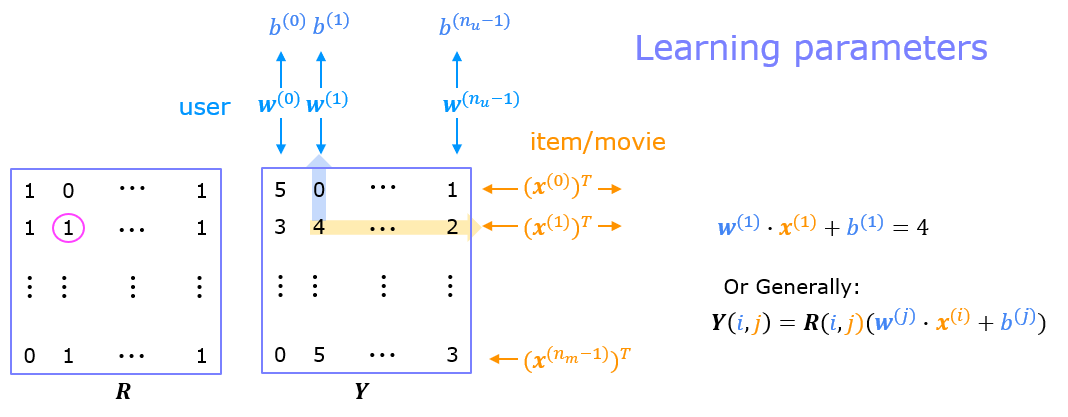

As classificações existentes são fornecidas em forma de matriz, conforme mostrado. $Y$ contém classificações; 0,5 a 5 inclusive em etapas de 0,5. 0 se o filme não tiver sido classificado. $R$ tem 1 onde os filmes foram avaliados. Os filmes estão em linhas, os usuários em colunas. Cada usuário possui um vetor de parâmetros $w^{user}$ e polarização. Cada filme possui um vetor de recursos $x^{movie}$. Esses vetores são aprendidos simultaneamente usando as classificações existentes do usuário/filme como dados de treinamento. Um exemplo de treinamento é mostrado acima: $\mathbf{w}^{(1)} \cdot \mathbf{x}^{(1)} + b^{(1)} = 4$. É importante notar que o vetor de recursos $x^{movie}$ deve satisfazer todos os usuários, enquanto o vetor de usuário $w^{user}$ deve satisfazer todos os filmes. Esta é a fonte do nome desta abordagem – todos os usuários colaboram para gerar o conjunto de classificações.

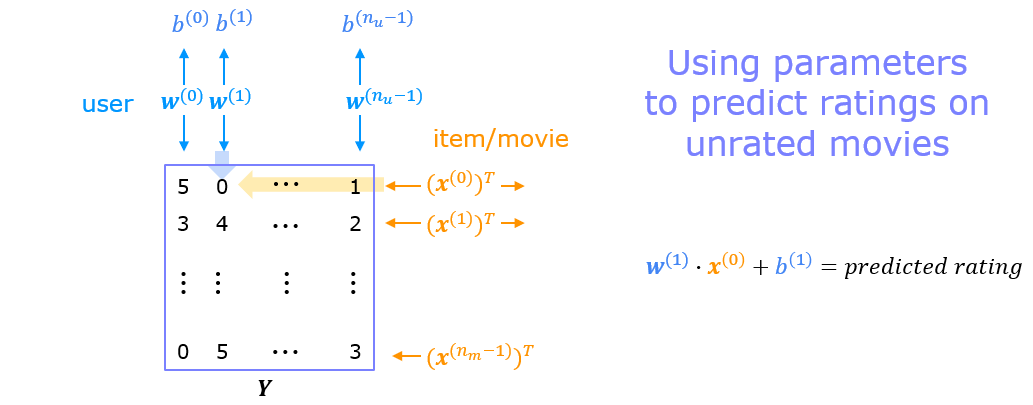

Depois que os vetores de recursos e parâmetros forem aprendidos, eles poderão ser usados ​​para prever como um usuário avaliaria um filme sem classificação. Isso é mostrado no diagrama acima. A equação é um exemplo de previsão de classificação para o usuário um no filme zero.

## Conjunto de dados de classificações de filmes
O conjunto de dados é derivado do conjunto de dados [MovieLens "ml-latest-small"](https://grouplens.org/datasets/movielens/latest/).   
[F. Maxwell Harper e Joseph A. Konstan. 2015. Os conjuntos de dados MovieLens: história e contexto. Transações ACM em Sistemas Inteligentes Interativos (TiIS) 5, 4: 19:1–19:19. <https://doi.org/10.1145/2827872>]

O conjunto de dados original tem 9.000 filmes avaliados por 600 usuários. O tamanho do conjunto de dados foi reduzido para focar nos filmes dos anos desde 2000. Este conjunto de dados consiste em classificações em uma escala de 0,5 a 5 em incrementos de 0,5 passos. O conjunto de dados reduzido tem $n_u = 443$ usuários e $n_m = 4778$ filmes. 

Abaixo, você carregará o conjunto de dados do filme nas variáveis ​​$Y$ e $R$.

A matriz $Y$ (uma matriz $n_m \times n_u$) armazena as classificações $y^{(i,j)}$. A matriz $R$ é uma matriz indicadora de valor binário, onde $R(i,j) = 1$ se o usuário $j$ deu uma classificação ao filme $i$, e $R(i,j)=0$ caso contrário. 

Ao longo desta parte do exercício, você também trabalhará com as
matrizes, $\mathbf{X}$, $\mathbf{W}$ e $\mathbf{b}$: 

$$\mathbf{X} = 
\begin{bmatrix}
--- (\mathbf{x}^{(0)})^T --- \\
--- (\mathbf{x}^{(1)})^T --- \\
\vdots\\
--- (\mathbf{x}^{(n_m-1)})^T --- \\
\end{bmatrix} , \quad
\mathbf{W} = 
\begin{bmatrix}
--- (\mathbf{w}^{(0)})^T --- \\
--- (\mathbf{w}^{(1)})^T --- \\
\vdots\\
--- (\mathbf{w}^{(n_u-1)})^T --- \\
\end{bmatrix},\quad
\mathbf{b} = 
\begin{bmatrix}
 b^{(0)} \\
 b^{(1)} \\
\vdots\\
b^{(n_u-1)} \\
\end{bmatrix}\quad
$$ 

A $i$-ésima linha de $\mathbf{X}$ corresponde ao
vetor de recursos $x^{(i)}$ para o $i$-ésimo filme e a $j$-ésima linha de
$\mathbf{W}$ corresponde a um vetor de parâmetros $\mathbf{w}^{(j)}$, para o
$j$-ésimo usuário. Ambos $x^{(i)}$ e $\mathbf{w}^{(j)}$ são vetores $n$-dimensionais. Para os propósitos deste exercício, você usará $n=10$, e
portanto, $\mathbf{x}^{(i)}$ e $\mathbf{w}^{(j)}$ têm 10 elementos.
Correspondentemente, $\mathbf{X}$ é uma
matriz $n_m \times 10$ e $\mathbf{W}$ é uma matriz $n_u \times 10$.

Começaremos carregando o conjunto de dados de classificações de filmes para entender a estrutura dos dados.
Carregaremos $Y$ e $R$ com o conjunto de dados do filme.  
Também carregaremos $\mathbf{X}$, $\mathbf{W}$ e $\mathbf{b}$ com valores pré-computados. Esses valores serão aprendidos posteriormente no laboratório, mas usaremos valores pré-calculados para desenvolver o modelo de custo.

In [3]:
# Carrega os dados
movies_df = pd.read_csv('../Downloads/ml-latest-small/ml-latest-small/movies.csv')
ratings_df = pd.read_csv('../Downloads/ml-latest-small/ml-latest-small/ratings.csv')

# Filtra filmes do ano 2000 em diante (ajuste esta parte conforme sua base de dados)
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)$')  # Extraindo o ano do título
movies_df['year'] = pd.to_numeric(movies_df['year'], errors='coerce')
movies_df = movies_df[movies_df['year'] >= 2000]

# Atualiza o DataFrame de ratings para incluir apenas os filmes filtrados
ratings_df = ratings_df[ratings_df['movieId'].isin(movies_df['movieId'])]

In [4]:
# Prepara a matriz Y e R
Y = pd.pivot_table(ratings_df, index='movieId', columns='userId', values='rating', fill_value=0)
R = Y.copy()
R[R > 0] = 1

# Inicializa X, W, b
num_movies = Y.shape[0]
num_users = Y.shape[1]
num_features = 10
X = np.random.rand(num_movies, num_features)
W = np.random.rand(num_users, num_features)
b = np.random.rand(1, num_users)

# Exibe as formas das matrizes
print("Y", Y.shape, "R", R.shape)
print("X", X.shape)
print("W", W.shape)
print("b", b.shape)
print("num_features", num_features)
print("num_movies",   num_movies)
print("num_users",    num_users)

Y (4771, 443) R (4771, 443)
X (4771, 10)
W (443, 10)
b (1, 443)
num_features 10
num_movies 4771
num_users 443


In [5]:
# Convertendo Y e R em arrays numpy se ainda não forem.
Y = np.array(Y)
R = np.array(R)

# Usando R para filtrar as classificações existentes de Y.
tsmean = np.mean(Y[0, R[0, :].astype(bool)])

print(f"Média de classificação para o filme 1: {tsmean:0.3f} / 5")

Média de classificação para o filme 1: 3.400 / 5


## Algoritmo de aprendizado de filtragem colaborativa

O algoritmo de filtragem colaborativa no contexto de recomendações de filmes considera um conjunto de vetores de parâmetros $n$-dimensionais $\mathbf{x}^{(0)}, \dots, \mathbf{x}^{(n_m-1)}$, $\mathbf{w}^{(0)}, \dots, \mathbf{w}^{(n_u-1)}$ e $b^{(0)}, \dots, b^{(n_u-1)}$, onde o modelo prevê a classificação para o filme $i$ pelo usuário $j$ como $y^{(i,j)} = \mathbf{w}^{(j)} \cdot \mathbf{x}^{(i)} + b^{(j)}$. Dado um conjunto de dados que consiste em um conjunto de classificações produzidas por alguns usuários em alguns filmes, você deseja aprender os vetores de parâmetros $\mathbf{x}^{(0)}, \dots, \mathbf{x}^{(n_m-1)}, \mathbf{w}^{(0)}, \dots, \mathbf{w}^{(n_u-1)}$ e $b^{(0)}, \dots, b^{(n_u-1)}$ que produzem o melhor ajuste (minimizam o erro quadrado).

### Função de custo de filtragem colaborativa

A função de custo de filtragem colaborativa é dada por
$$J(\mathbf{x}^{(0)}, \dots, \mathbf{x}^{(n_m-1)}, \mathbf{w}^{(0)}, b^{(0)}, \dots, \mathbf{w}^{(n_u-1)}, b^{(n_u-1)})= \left[ \frac{1}{2}\sum_{(i,j) : r(i,j)=1}(\mathbf{w}^{(j)} \cdot \mathbf{x}^{(i)} + b^{(j)} - y^{(i,j)})^2 \right]
+ \left[
\frac{\lambda}{2}
\sum_{j=0}^{n_u-1}\sum_{k=0}^{n-1}(\mathbf{w}^{(j)}_k)^2
+ \frac{\lambda}{2}\sum_{i=0}^{n_m-1}\sum_{k=0}^{n-1}(\mathbf{x}_k^{(i)})^2
\right]_{\text{regularização}}
\tag{1}$$
A primeira soma em (1) é "para todos $i$, $j$ onde $r(i,j)$ é igual a $1$" e poderia ser escrita:

$$
= \left[ \frac{1}{2}\sum_{j=0}^{n_u-1} \sum_{i=0}^{n_m-1}r(i,j)*(\mathbf{w}^{(j)} \cdot \mathbf{x}^{(i)} + b^{(j)} - y^{(i,j)})^2 \right]
+\text{regularização}
$$

**Implementação com laços for:**   
Comece implementando a função de custo usando laços for. Considere desenvolver a função de custo em duas etapas. Primeiro, desenvolva a função de custo sem regularização. Um caso de teste que não inclui regularização é fornecido abaixo para testar sua implementação. Uma vez que isso esteja funcionando, adicione regularização e execute os testes que incluem regularização. Note que você deve acumular o custo para o usuário $j$ e o filme $i$ somente se $R(i,j) = 1$.

In [6]:
def cofi_cost_func(X, W, b, Y, R, lambda_):
    # Define as dimensões da matriz Y, onde nm é o número de filmes e nu é o número de usuários
    nm, nu = Y.shape
    J = 0  # Inicializa o custo total J
 
    # Percorre todas as linhas (filmes) e colunas (usuários) da matriz Y
    for i in range(nm):
        for j in range(nu):
            # Verifica se o filme i foi avaliado pelo usuário j
            if R[i][j] == 1:
                # Calcula o erro de previsão: predição (produto escalar de W e X mais o viés) menos a avaliação real
                prediction_error = np.dot(W[j], X[i]) + b[0][j] - Y[i][j]
                # Acumula o quadrado do erro de previsão no custo total
                J += (prediction_error ** 2)

    # Calcula o custo de regularização, que penaliza os valores grandes nos vetores de parâmetros para evitar o overfitting
    regularization_cost = ((lambda_/2) * np.sum(W**2)) + ((lambda_/2) * np.sum(X**2))
    # Soma o custo de regularização ao custo total e divide o erro quadrático pela metade (conforme a fórmula da função de custo)
    J = (J/2) + regularization_cost
    
    return J  # Retorna o custo total computado

In [7]:
# Reduz o tamanho do conjunto de dados para que a execução seja mais rápida
num_users_r = 4
num_movies_r = 5 
num_features_r = 3

# Reduz as matrizes para os tamanhos especificados
X_r = X[:num_movies_r, :num_features_r]
W_r = W[:num_users_r,  :num_features_r]
b_r = b[0, :num_users_r].reshape(1,-1)
Y_r = Y[:num_movies_r, :num_users_r]
R_r = R[:num_movies_r, :num_users_r]

# Avalia a função de custo
J = cofi_cost_func(X_r, W_r, b_r, Y_r, R_r, 0)
print(f"Custo: {J:0.2f}")

Custo: 4.21


In [8]:
# Avalia o custo com regularização
J = cofi_cost_func(X_r, W_r, b_r, Y_r, R_r, 1.5)
print(f"Custo (com regularização): {J:0.2f}")

Custo (com regularização): 12.29


**Implementação vetorizada**

É importante criar uma implementação vetorizada para calcular $J$, pois posteriormente ela será chamada várias vezes durante a otimização.

In [9]:
def cofi_cost_func_v(X, W, b, Y, R, lambda_):
    # Calcula o erro de predição para cada par usuário-filme, considerando apenas as entradas onde há avaliações (R != 0)
    # tf.linalg.matmul(X, tf.transpose(W)) realiza o produto escalar entre os vetores de características dos filmes e dos usuários
    # 'b - Y' subtrai as avaliações reais das predições e 'R' zera os erros onde não há avaliações, seguindo a matriz indicadora R
    j = (tf.linalg.matmul(X, tf.transpose(W)) + b - Y) * R
    
    # Calcula o custo J combinando o erro quadrático médio e o termo de regularização
    # 0.5 * tf.reduce_sum(j**2) calcula a metade da soma dos quadrados dos erros de predição
    # (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2)) adiciona a regularização, que penaliza grandes valores em X e W para evitar overfitting
    J = 0.5 * tf.reduce_sum(j**2) + (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
    
    return J  # Retorna o custo total J calculado

In [10]:
# Avalia a função de custo
J = cofi_cost_func_v(X_r, W_r, b_r, Y_r, R_r, 0)
print(f"Custo: {J:0.2f}")

# Avalia o custo com regularização
J = cofi_cost_func_v(X_r, W_r, b_r, Y_r, R_r, 1.5)
print(f"Custo (com regularização): {J:0.2f}")

Custo: 4.21
Custo (com regularização): 12.29


## Aprendendo recomendações de filmes
------------------------------

Após finalizar a implementação da função de custo de filtragem colaborativa, você pode começar a treinar seu algoritmo para fazer recomendações de filmes para você.

Na célula abaixo, você pode inserir suas próprias escolhas de filmes. O algoritmo, então, fará recomendações para você! Preenchemos alguns valores de acordo com nossas preferências, mas depois que tudo estiver funcionando com nossas escolhas, você deve alterar isso para corresponder aos seus gostos.


In [11]:
def load_Movie_List_pd():
    # Carrega os dados de filmes e avaliações dos arquivos CSV
    movieList_df = pd.read_csv('../Downloads/ml-latest-small/ml-latest-small/movies.csv')
    ratings_df = pd.read_csv('../Downloads/ml-latest-small/ml-latest-small/ratings.csv')
    
    # Calcula as estatísticas de avaliação para cada filme
    rating_stats = ratings_df.groupby('movieId').agg(
        mean_rating=('rating', 'mean'),  # Média das avaliações
        number_of_ratings=('rating', 'size')  # Número de avaliações
    )
    
    # Mescla as estatísticas de avaliação com o DataFrame de filmes
    movieList_df = movieList_df.merge(rating_stats, on='movieId', how='left')
    
    # Trata filmes que não possuem avaliações
    movieList_df['mean_rating'] = movieList_df['mean_rating'].fillna(0)
    movieList_df['number_of_ratings'] = movieList_df['number_of_ratings'].fillna(0)
    
    movieList = movieList_df['title'].tolist()
    
    return movieList, movieList_df

In [12]:
movieList, movieList_df = load_Movie_List_pd()
num_movies = len(movieList_df)  # Define num_movies como o número de filmes no DataFrame

my_ratings = np.zeros(num_movies)  # Inicializa minhas classificações com o número correto de filmes

# Por exemplo, para classificar com "5", você pode configurar
my_ratings[2700] = 5 

# Ou suponha que você não gostou você pode configurar
my_ratings[2609] = 2

# Selecionamos alguns filmes que gostamos / não gostamos e classificamos com 1-5 estrelas
my_ratings[929]  = 5   
my_ratings[246]  = 5   
my_ratings[2716] = 3   
my_ratings[1150] = 5   
my_ratings[382]  = 2   
my_ratings[366]  = 5   
my_ratings[622]  = 5   
my_ratings[988]  = 3  
my_ratings[2925] = 1   
my_ratings[2937] = 1  
my_ratings[793]  = 5   
my_rated = [i for i in range(len(my_ratings)) if my_ratings[i] > 0]

print('\nNovas classificações do usuário:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0 :
        print(f'Classificado com {my_ratings[i]} para {movieList_df.loc[i,"title"]}')


Novas classificações do usuário:

Classificado com 5.0 para New York Cop (Nyû Yôku no koppu) (1993)
Classificado com 5.0 para Blink (1994)
Classificado com 2.0 para Cowboy Way, The (1994)
Classificado com 5.0 para Nutty Professor, The (1996)
Classificado com 5.0 para Die Hard (1988)
Classificado com 5.0 para Raging Bull (1980)
Classificado com 3.0 para Koyaanisqatsi (a.k.a. Koyaanisqatsi: Life Out of Balance) (1983)
Classificado com 5.0 para Romy and Michele's High School Reunion (1997)
Classificado com 2.0 para Son of the Sheik, The (1926)
Classificado com 5.0 para Mission: Impossible II (2000)
Classificado com 3.0 para Fighting Seabees, The (1944)
Classificado com 1.0 para Bikini Beach (1964)
Classificado com 1.0 para Slumber Party Massacre III (1990)


Agora, vamos adicionar essas avaliações a $Y$ e $R$ e normalizar as avaliações.

In [13]:
def load_ratings_small(movieList_df):
    # Carrega os dados de avaliações dos arquivos CSV
    ratings_df = pd.read_csv('../Downloads/ml-latest-small/ml-latest-small/ratings.csv')

    # Filtra as avaliações para incluir apenas os filmes no DataFrame de filmes
    filtered_ratings_df = ratings_df[ratings_df['movieId'].isin(movieList_df['movieId'])]

    # Cria uma tabela pivot para transformar os dados em uma matriz de avaliações de filmes por usuários
    Y_df = pd.pivot_table(filtered_ratings_df, index='movieId', columns='userId', values='rating', fill_value=0)

    # Garante que todos os filmes no movieList_df estejam presentes em Y_df
    missing_movie_ids = set(movieList_df['movieId']) - set(Y_df.index)
    for missing_movie_id in missing_movie_ids:
        Y_df.loc[missing_movie_id] = 0

    # Ordena Y_df para garantir que a ordem dos filmes corresponda a movieList_df
    Y_df = Y_df.loc[movieList_df['movieId']]

    # Cria uma matriz indicadora onde cada entrada é 1 se houver avaliação e 0 caso contrário
    R = Y_df.copy()
    R[R > 0] = 1

    # Converte as matrizes de DataFrame para arrays numpy para processamento futuro
    Y = Y_df.values
    R = R.values
    movie_ids = Y_df.index.values  # Extrai movieIds do índice de Y_df

    return Y, R, movie_ids

def normalizeRatings(Y, R):
    # Obtém o número de filmes (m) e usuários (n)
    m, n = Y.shape
    Ymean = np.zeros(m)  # Inicializa um array para armazenar as médias das avaliações dos filmes
    Ynorm = np.zeros(Y.shape)  # Inicializa uma matriz para as avaliações normalizadas

    # Calcula a média das avaliações para cada filme e normaliza as avaliações subtraindo a média
    for i in range(m):
        idx = np.where(R[i, :] == 1)[0]  # Encontra os índices dos usuários que avaliaram o filme i
        Ymean[i] = np.mean(Y[i, idx]) if len(idx) > 0 else 0  # Calcula a média apenas onde há avaliações
        Ynorm[i, idx] = Y[i, idx] - Ymean[i]  # Normaliza as avaliações subtraindo a média

    return Ynorm, Ymean


Y, R, movie_ids = load_ratings_small(movieList_df)  # Carrega os dados de avaliações
Y = np.c_[my_ratings, Y]  # Adiciona suas avaliações ao conjunto de dados de avaliações
R = np.c_[(my_ratings != 0).astype(int), R]  # Adiciona à matriz indicadora uma coluna para suas avaliações
Ynorm, Ymean = normalizeRatings(Y, R)  # Normaliza o conjunto de dados

In [14]:
# Valores Úteis
num_movies, num_users = Y.shape  # Obtém o número de filmes e usuários a partir da matriz de avaliações Y
num_features = 100  # Define o número de características latentes para filmes e usuários

# Configura os parâmetros iniciais (W, X), usa tf.Variable para rastrear essas variáveis
tf.random.set_seed(1234)  # Define uma semente aleatória para resultados consistentes

# W é uma matriz de características do usuário, onde cada usuário tem 'num_features' características
W = tf.Variable(tf.random.normal((num_users, num_features), dtype=tf.float64), name='W')

# X é uma matriz de características de filmes, onde cada filme tem 'num_features' características
X = tf.Variable(tf.random.normal((num_movies, num_features), dtype=tf.float64), name='X')

# b é um vetor de viés para cada usuário
b = tf.Variable(tf.random.normal((1, num_users), dtype=tf.float64), name='b')

# Instancia um otimizador.
# O otimizador Adam é utilizado aqui com uma taxa de aprendizagem de 0.1
optimizer = keras.optimizers.Adam(learning_rate=1e-1)

Vamos agora treinar o modelo de filtragem colaborativa. Isso aprenderá os parâmetros $\mathbf{X}$, $\mathbf{W}$ e $\mathbf{b}$.

As operações envolvidas no aprendizado de $w$, $b$ e $x$ simultaneamente não se enquadram nas 'camadas' típicas oferecidas no pacote de rede neural TensorFlow.  Conseqüentemente, o fluxo usado: Model, Compile(), Fit(), Predict(), não são diretamente aplicáveis. Em vez disso, podemos usar um loop de treinamento personalizado.
    
O TensorFlow tem a capacidade maravilhosa de calcular as derivadas para você. Isso é mostrado abaixo. Na seção `tf.GradientTape()`, as operações nas variáveis ​​do Tensorflow são rastreadas. Quando `tape.gradient()` for chamado posteriormente, ele retornará o gradiente da perda em relação às variáveis ​​​​rastreadas. Os gradientes podem então ser aplicados aos parâmetros usando um otimizador. 
Esta é uma breve introdução a um recurso útil do TensorFlow e de outras estruturas de aprendizado de máquina. Mais informações podem ser encontradas investigando "loops de treinamento personalizados" dentro da estrutura de interesse.

In [15]:
# Número de iterações para o treinamento
iterations = 400
# Parâmetro de regularização lambda
lambda_ = 1

# Loop de treinamento por um número definido de iterações
for iter in range(iterations):
    # TensorFlow's GradientTape é usado para registrar operações para calcular o gradiente
    with tf.GradientTape() as tape:

        # Calcula o custo, incluindo o passo forward dentro da função de custo
        cost_value = cofi_cost_func_v(X, W, b, Ynorm, R, lambda_)

    # O GradientTape automaticamente recupera os gradientes das variáveis treináveis em relação à perda
    grads = tape.gradient(cost_value, [X, W, b])

    # Executa um passo do gradiente descendente atualizando
    # o valor das variáveis para minimizar a perda
    optimizer.apply_gradients(zip(grads, [X, W, b]))

    # Loga periodicamente o progresso
    if iter % 20 == 0:
        print(f"Erro de treinamento na iteração: {iter}: {cost_value:0.1f}")

Erro de treinamento na iteração: 0: 5558100.1
Erro de treinamento na iteração: 20: 279463.3
Erro de treinamento na iteração: 40: 107961.3
Erro de treinamento na iteração: 60: 53015.5
Erro de treinamento na iteração: 80: 30348.5
Erro de treinamento na iteração: 100: 19407.7
Erro de treinamento na iteração: 120: 13543.3
Erro de treinamento na iteração: 140: 10180.7
Erro de treinamento na iteração: 160: 8158.7
Erro de treinamento na iteração: 180: 6896.9
Erro de treinamento na iteração: 200: 6084.2
Erro de treinamento na iteração: 220: 5545.6
Erro de treinamento na iteração: 240: 5179.0
Erro de treinamento na iteração: 260: 4922.8
Erro de treinamento na iteração: 280: 4739.2
Erro de treinamento na iteração: 300: 4604.1
Erro de treinamento na iteração: 320: 4502.4
Erro de treinamento na iteração: 340: 4424.0
Erro de treinamento na iteração: 360: 4362.1
Erro de treinamento na iteração: 380: 4312.3


## Recomendações
Abaixo, calculamos as classificações de todos os filmes e usuários e exibimos os filmes recomendados. Eles são baseados nos filmes e nas classificações inseridas como `my_ratings[]` acima. Para prever a classificação do filme $i$ para o usuário $j$, você calcula $\mathbf{w}^{(j)} \cdot \mathbf{x}^{(i)} + b^{(j)} $. Isso pode ser calculado para todas as classificações usando multiplicação de matrizes.

In [16]:
# Faz uma previsão usando os pesos e vieses treinados
p = np.matmul(X.numpy(), np.transpose(W.numpy())) + b.numpy()

# Restaura a média às previsões para obter as previsões finais no espaço original da classificação
pm = p + Ymean[:, np.newaxis]  # Adiciona uma nova dimensão para compatibilizar as formas

# Extrai as previsões apenas para o novo usuário (assumindo que ele está na primeira coluna)
my_predictions = pm[:, 0]

# Ordena as previsões em ordem decrescente
ix = np.argsort(my_predictions)[::-1]  # Alterado para uso de np.argsort para clareza

# Imprime as 17 melhores previsões de filmes que o novo usuário não classificou ainda
for i in range(17):
    j = ix[i]
    if j not in my_rated:
        print(f'Prevendo classificação {my_predictions[j]:0.2f} para o filme {movieList[j]}')

print('\n\nOriginal vs Classificação prevista:\n')
# Compara as classificações originais com as previsões
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print(f'Original {my_ratings[i]}, Predição {my_predictions[i]:0.2f} para {movieList[i]}')

Prevendo classificação 5.25 para o filme Into the Forest of Fireflies' Light (2011)
Prevendo classificação 5.20 para o filme Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
Prevendo classificação 5.20 para o filme Villain (1971)
Prevendo classificação 5.20 para o filme Black Mirror
Prevendo classificação 5.19 para o filme Lesson Faust (1994)
Prevendo classificação 5.19 para o filme Sorority House Massacre (1986)
Prevendo classificação 5.19 para o filme Slumber Party Massacre II (1987)
Prevendo classificação 5.19 para o filme Sorority House Massacre II (1990)
Prevendo classificação 5.18 para o filme Monster Squad, The (1987)
Prevendo classificação 5.18 para o filme Dr. Goldfoot and the Bikini Machine (1965)
Prevendo classificação 5.18 para o filme Woman Is a Woman, A (femme est une femme, Une) (1961)
Prevendo classificação 5.18 para o filme Animals are Beautiful People (1974)
Prevendo classificação 5.18 para o filme Thousand Clowns, A (1965)
Prevendo class

Na prática, informações adicionais podem ser utilizadas para melhorar nossas previsões. Acima, as classificações previstas para as primeiras centenas de filmes estão em uma faixa pequena. Podemos aumentar o que foi dito acima selecionando entre os melhores filmes, filmes com classificações médias altas e filmes com mais de 20 classificações.

In [17]:
movieList_df['predictions'] = my_predictions
top_movies = movieList_df.sort_values('predictions', ascending=False)
print('\nTop 10 filmes recomendados:\n')
top_movies[['title', 'mean_rating', 'number_of_ratings', 'predictions']].head(10)


Top 10 filmes recomendados:



,title,mean_rating,number_of_ratings,predictions
8645,Into the Forest of Fireflies' Light (2011),5.0000,1.0,5.247498
900,Raiders of the Lost Ark (Indiana Jones and the...,4.2075,200.0,5.201886
8961,Villain (1971),5.0000,1.0,5.201448
9611,Black Mirror,5.0000,1.0,5.198970
870,Lesson Faust (1994),5.0000,2.0,5.194134
2938,Sorority House Massacre (1986),5.0000,1.0,5.189856
2936,Slumber Party Massacre II (1987),5.0000,1.0,5.189790
2939,Sorority House Massacre II (1990),5.0000,1.0,5.189148
3081,"Monster Squad, The (1987)",5.0000,1.0,5.184623
3256,Dr. Goldfoot and the Bikini Machine (1965),5.0000,1.0,5.179849


# Filtragem colaborativa versus filtragem baseada em conteúdo

A abordagem de filtragem baseada em conteúdo, ou content-based filtering, é um método poderoso usado nos sistemas de recomendação que difere significativamente da filtragem colaborativa, principalmente pelo uso direto das características dos itens e dos usuários para gerar recomendações. Vamos explorar como essa abordagem é implementada e seus benefícios potenciais.

### Fundamentos da Filtragem Baseada em Conteúdo

#### **Diferenças em Relação à Filtragem Colaborativa**
Enquanto a filtragem colaborativa depende das avaliações passadas dos usuários para identificar similaridades entre eles e recomendar produtos, a filtragem baseada em conteúdo se concentra nas características dos itens e dos usuários para fazer recomendações. Isso significa que, mesmo na ausência de avaliações interusuários extensas, o sistema ainda pode funcionar efetivamente ao utilizar as informações detalhadas dos itens e perfis dos usuários.

#### **Utilização de Características dos Usuários e Itens**
Para implementar a filtragem baseada em conteúdo, as características tanto dos usuários quanto dos itens são meticulosamente compiladas e utilizadas:

- **Características dos Usuários**: Incluem dados demográficos como idade e gênero, localização geográfica, e comportamentos passados, como filmes assistidos ou avaliados. Esses dados podem ser transformados em vetores de características usando métodos como codificação one-hot para categorias discretas.

- **Características dos Itens**: Para filmes, por exemplo, características como o ano de lançamento, gênero(s), críticas dos críticos, e médias de avaliações recebidas podem ser utilizadas. As médias de avaliações podem ser calculadas globalmente ou segmentadas por demografia ou localização.

#### **Construção de Vetores de Características**
- **Vetor de Características do Usuário (`x_u^j`)**: Compila as informações e preferências do usuário `j`, incluindo médias de avaliações por gênero de filmes, o que oferece uma rica descrição do perfil do usuário.
  
- **Vetor de Características do Item (`x_m^i`)**: Agrega informações sobre o item `i`, como filmes, incluindo dados objetivos e subjetivos como avaliações médias.

### **Processo de Recomendação**

Usando esses vetores, o sistema pode então calcular a compatibilidade entre um usuário e um item. Por exemplo, a compatibilidade pode ser determinada através de um produto escalar entre os vetores de características do usuário e do item, ajustado por qualquer função ou modelo adicional para melhorar a precisão da previsão.

### **Vantagens da Filtragem Baseada em Conteúdo**

1. **Independência das Avaliações de Outros Usuários**: Diferentemente da filtragem colaborativa, que requer uma massa crítica de avaliações de usuários, a filtragem baseada em conteúdo pode funcionar efetivamente mesmo com poucas avaliações, tornando-a ideal para novos usuários ou itens.

2. **Personalização Profunda**: Ao utilizar informações detalhadas sobre preferências e características dos usuários, a filtragem baseada em conteúdo permite uma personalização mais profunda, potencialmente aumentando a satisfação do usuário.

3. **Flexibilidade para Novos Itens**: Trata eficientemente o problema do início frio para novos itens, uma vez que não depende exclusivamente das avaliações dos usuários para fazer recomendações.

### **Desafios**

- **Coleta e Manutenção de Dados**: A eficácia do sistema depende fortemente da qualidade e da abrangência dos dados coletados, requerendo sistemas robustos para coleta e manutenção de dados atualizados e relevantes.
- **Complexidade do Modelo**: A implementação pode se tornar complexa à medida que o número de características e a necessidade de manter esses vetores atualizados crescem.

### Reformulação do Modelo de Filtragem Baseada em Conteúdo

#### Vetores de Características
- **Vetores de Usuário (`v_j^u`)**: Cada vetor de usuário é uma compilação de números que representam quantitativamente as preferências do usuário. Por exemplo, uma entrada no vetor pode quantificar o quanto o usuário gosta de filmes de romance, enquanto outra entrada pode representar sua preferência por filmes de ação.
- **Vetores de Filme (`v_i^m`)**: De maneira similar, cada vetor de filme contém elementos que descrevem as características do filme, como o quanto ele é romântico ou o quanto ele é voltado para ação.

#### Previsão de Avaliações
A avaliação predita que o usuário $ j $ daria ao filme $ i $ é calculada pelo produto escalar dos vetores $ v_j^u $ e $ v_i^m $. Este cálculo combina as preferências do usuário com as características do filme para gerar uma pontuação que representa o quanto esse usuário específico provavelmente gostará desse filme específico.

### Desafios na Implementação

#### Computação dos Vetores
- **Vetores de Usuário (`v_j^u`)**: Como transformar as características brutas de um usuário, tais como idade, gênero, localização e histórico de avaliações, em um vetor que representa suas preferências? Isso geralmente envolve técnicas de aprendizado de máquina para reduzir a dimensão dos dados e capturar os aspectos mais relevantes das preferências do usuário.
- **Vetores de Filme (`v_i^m`)**: De forma análoga, transformar informações sobre filmes em um vetor compacto que captura suas características essenciais é um desafio que pode envolver desde análise de elementos textuais (como descrições ou críticas) até dados numéricos (como médias de avaliações e popularidade).

#### Dimensionalidade dos Vetores
Ambos os vetores, $ v_j^u $ e $ v_i^m $, precisam ter a mesma dimensão para que o produto escalar seja computacionalmente viável. Essa exigência implica que o processo de extração de características deve ser cuidadosamente projetado para assegurar que tanto as características dos usuários quanto dos filmes sejam representadas em um espaço comum com dimensões consistentes.

# Aprendizado profundo para filtragem baseada em conteúdo

O desenvolvimento de um algoritmo de filtragem baseada em conteúdo utilizando redes neurais profundas representa uma abordagem moderna e eficaz para sistemas de recomendação. Esse método aproveita as capacidades de aprendizado de características profundas das redes neurais para modelar de maneira precisa as preferências dos usuários e as características dos itens.

### Estrutura do Modelo de Filtragem Baseada em Conteúdo com Redes Neurais

#### **Redes Neurais para Usuários e Itens**
- **Rede Neural do Usuário**: Esta rede toma como entrada as características do usuário, como idade, gênero e país. Através de várias camadas densas, essa rede produz um vetor de características $ v_u $ que captura as preferências do usuário de forma compacta. A camada de saída dessa rede é dimensionada para gerar um vetor com múltiplas unidades (por exemplo, 32), refletindo diferentes aspectos das preferências do usuário.
  
- **Rede Neural do Filme**: De forma similar, uma rede dedicada processa as características dos filmes, como ano de lançamento e atores principais, para gerar um vetor de características $ v_m $ que descreve o filme. Esta rede também culmina em uma camada de saída que gera um vetor de dimensão compatível com o vetor do usuário.

#### **Predição de Avaliações**
A avaliação que um usuário daria a um filme é predita pelo produto escalar dos vetores $ v_u $ e $ v_m $ resultantes das duas redes. Se o objetivo for prever uma classificação binária (por exemplo, gosto/não gosto), a saída do produto escalar pode ser passada por uma função sigmóide para estimar a probabilidade de o usuário gostar do item.

### Treinamento e Otimização do Modelo

#### **Função de Custo**
A função de custo $ J $ é formulada de modo semelhante à usada em filtragem colaborativa, onde a diferença entre a predição e a avaliação real é minimizada. Para todos os pares $ (i, j) $ onde a avaliação é conhecida, o erro quadrático é calculado entre o produto escalar de $ v_u^j $ e $ v_m^i $ e a avaliação real $ y^{i,j} $.

#### **Regularização**
Para evitar o sobreajuste, um termo de regularização pode ser adicionado à função de custo, penalizando grandes valores nos pesos da rede neural. Isso ajuda a manter os parâmetros do modelo moderados, promovendo uma generalização mais eficaz.

#### **Otimização**
Algoritmos de otimização, como o gradiente descendente ou métodos mais avançados como Adam, são utilizados para ajustar os parâmetros das redes de modo que a função de custo seja minimizada. Não há procedimentos de treinamento separados para as redes do usuário e do filme; ambos são otimizados simultaneamente para produzir vetores que melhor predizem as avaliações dos usuários.

### Vantagens e Aplicações

- **Personalização Profunda**: A capacidade de extrair e utilizar características profundas dos usuários e dos filmes permite uma personalização detalhada e sensível ao contexto.
- **Flexibilidade**: O modelo pode facilmente adaptar-se a novos usuários e novos filmes, desde que características relevantes possam ser fornecidas.
- **Descoberta de Itens Similares**: Após o treinamento, os vetores característicos também podem ser utilizados para encontrar itens similares, aproveitando a semelhança nos espaços de características aprendidos.

### Encontrando Itens Similares com Vetores Característicos

#### **Cálculo de Similaridade**
Para determinar filmes similares dentro do catálogo, utilizam-se os vetores $ v^i_m $ que descrevem cada filme. A similaridade entre dois filmes $ i $ e $ k $ pode ser calculada através da distância euclidiana ao quadrado entre seus vetores:
$$
\text{Distância}^2 = \sum (\text{vetor do filme } i - \text{vetor do filme } k)^2
$$
Essa métrica quantifica quão próximos os filmes estão no espaço de características, com distâncias menores indicando maior similaridade.

#### **Otimização de Consultas de Similaridade**
Uma vez que calcular a similaridade entre todos os pares de filmes em um catálogo grande pode ser computacionalmente custoso, essa operação é ideal para ser executada de forma pré-computada. Servidores podem processar essa tarefa durante períodos de baixa demanda (como durante a noite) para preparar uma lista dos filmes mais similares para cada item no catálogo.

### Aplicações Práticas

#### **Recomendações Instantâneas**
Quando um usuário está navegando por um filme específico, o sistema pode rapidamente apresentar uma lista de filmes similares baseada nos resultados pré-computados. Isso não apenas melhora a experiência do usuário ao reduzir o tempo de espera por recomendações, mas também diminui a carga computacional em tempo real no servidor.

#### **Escalabilidade**
A capacidade de pré-computar recomendações de filmes similares é crucial para escalar sistemas de recomendação para grandes catálogos. Essa estratégia permite que o sistema lide eficientemente com um grande número de consultas simultâneas, mantendo a responsividade e a relevância das recomendações.

# Recomendando a partir de um grande catálogo

Na abordagem avançada de sistemas de recomendação que utilizam duas etapas distintas, chamadas de **etapa de recuperação** e **etapa de classificação**, é possível gerenciar eficientemente grandes catálogos de itens, como filmes em uma plataforma de streaming ou produtos em um site de compras. Essa metodologia permite lidar com a vasta quantidade de dados de forma rápida e precisa, melhorando significativamente a experiência do usuário ao fornecer recomendações relevantes e personalizadas.

### Etapa de Recuperação (Retrieval Step)

Na etapa de recuperação, o objetivo é gerar uma lista extensa, mas plausível, de candidatos a partir do catálogo disponível. Essa lista não precisa ser perfeita, podendo incluir itens que talvez não sejam do total agrado do usuário. O processo é projetado para ser rápido e cobrir uma ampla gama de possíveis interesses do usuário, garantindo que opções valiosas não sejam descartadas prematuramente.

#### **Implementação da Recuperação:**
- **Baseado em Histórico:** Por exemplo, para um usuário que visualizou um determinado filme, o sistema pode buscar rapidamente filmes semelhantes que foram previamente indexados.
- **Preferências de Gênero:** Adicionam-se filmes populares dentro dos gêneros mais assistidos pelo usuário.
- **Popularidade Regional:** Incluem-se filmes que são tendências no país do usuário.

Essas ações são efetuadas utilizando estruturas de dados que permitem buscas rápidas e eficientes, como tabelas de busca pré-computadas, garantindo que o processo de recuperação seja executado em tempo real sem atrasos significativos.

### Etapa de Classificação (Ranking Step)

Após a coleta inicial na etapa de recuperação, a etapa de classificação assume o papel de avaliar cuidadosamente cada um dos itens selecionados. Nesta fase, utiliza-se o modelo de aprendizado profundo para prever quão bem cada item se alinha às preferências do usuário.

#### **Processo de Classificação:**
- **Predição de Avaliações:** Utiliza-se a rede neural para calcular a predição de avaliação para cada par usuário-item. Essa avaliação é baseada na interação dos vetores de características do usuário e do item.
- **Otimização da Predição:** Se os vetores característicos dos filmes (VM) foram pré-computados, o sistema precisa apenas calcular o vetor do usuário (VU) uma vez. Em seguida, realiza-se o produto interno entre VU e os VMs dos filmes recuperados para determinar quais filmes têm maior probabilidade de receber avaliações altas.

### Otimização e Testes

A escolha de quantos itens recuperar durante a etapa de recuperação pode significativamente impactar tanto a performance quanto a precisão das recomendações finais. Experimentos offline podem ajudar a determinar o equilíbrio ideal entre velocidade e relevância, ajustando o número de itens recuperados para maximizar a eficácia das recomendações sem comprometer a velocidade de resposta do sistema.

# Uso ético de sistemas de recomendação

Os sistemas de recomendação são ferramentas poderosas na era digital, amplamente utilizados por empresas para maximizar o engajamento dos usuários e aumentar lucros. No entanto, o impacto desses sistemas vai além dos benefícios econômicos, afetando de maneira significativa o comportamento do usuário e, potencialmente, a sociedade como um todo.

### Impactos e Desafios Éticos dos Sistemas de Recomendação

#### **Maximização de Lucro vs. Relevância**
Em muitos casos, os sistemas de recomendação são configurados para priorizar produtos ou conteúdos que maximizem os lucros, em vez de focar na relevância ou utilidade para o usuário. Isso pode levar a uma experiência do usuário onde os itens mais promovidos não necessariamente atendem às suas necessidades ou preferências, mas sim aos interesses financeiros da plataforma.

#### **Publicidade e Cliques**
Na publicidade online, sistemas de recomendação frequentemente mostram anúncios com maior probabilidade de serem clicados e que geram mais receita por clique. Isso pode resultar em uma seleção de anúncios que não só pode ser irritante ou irrelevante para o usuário, mas que também pode manipular preferências e comportamentos de consumo de forma pouco ética.

#### **Transparência e Confiança**
A falta de transparência sobre como e por que certos produtos ou conteúdos são recomendados pode erodir a confiança do usuário nas plataformas. Usuários podem não estar cientes de que suas interações estão sendo direcionadas para maximizar lucros, e não para enriquecer sua experiência online.

#### **Maximização do Tempo de Tela**
Plataformas de vídeo e redes sociais muitas vezes otimizam seus sistemas para manter os usuários engajados pelo maior tempo possível, uma prática que pode levar a hábitos de consumo de mídia prejudiciais. Essa estratégia visa aumentar as receitas publicitárias, mas pode ter consequências negativas para o bem-estar dos usuários.

### Propostas para Mitigar os Impactos Negativos

#### **Desenvolvimento Ético**
Desenvolver sistemas de recomendação com considerações éticas desde o início pode ajudar a garantir que as tecnologias sejam utilizadas para melhorar genuinamente a experiência do usuário. Isso inclui a integração de métricas de satisfação do usuário e utilidade juntamente com os objetivos de lucro.

#### **Promover a Transparência**
Fornecer aos usuários informações claras sobre como os dados são utilizados para gerar recomendações e quais critérios estão sendo priorizados pode ajudar a construir uma relação de confiança e permitir escolhas mais informadas por parte dos usuários.

#### **Regulamentação e Fiscalização**
Implementar regulamentações que exijam transparência das empresas sobre suas práticas de recomendação e que protejam os usuários de manipulações indesejadas pode ser um passo crucial para garantir que essas tecnologias sejam usadas de maneira responsável.

#### **Foco no Bem-estar do Usuário**
Adotar abordagens que equilibrem o tempo de tela com o bem-estar do usuário, evitando estratégias que simplesmente visem maximizar a permanência nos sites, pode contribuir para uma relação mais saudável entre usuários e tecnologias.

### Ciclos Virtuosos e Viciosos

#### **Exemplo Positivo: Indústria de Viagens**
Empresas de viagens que proporcionam experiências memoráveis podem se beneficiar de um ciclo virtuoso em que a satisfação do cliente leva a maior lucratividade, permitindo-lhes investir mais em publicidade e atrair ainda mais clientes. Este ciclo fortalece as empresas que realmente valorizam e servem bem seus clientes.

#### **Exemplo Problemático: Indústria de Empréstimos "Payday"**
Contrastando com o exemplo positivo, empresas de empréstimos "payday" que exploram consumidores com taxas de juros extremamente altas podem também entrar em um ciclo de feedback positivo onde a eficiência em maximizar lucros às custas do cliente lhes permite gastar mais em publicidade e, por consequência, explorar ainda mais pessoas. Este ciclo favorece práticas empresariais que são prejudiciais aos consumidores e à sociedade.

### Amplificação de Conteúdo Problemático

Plataformas de mídia social e sites de compartilhamento de vídeos frequentemente otimizam seus sistemas para maximizar o engajamento do usuário. No entanto, isso pode levar à promoção involuntária de teorias da conspiração ou conteúdos tóxicos, que, apesar de altamente envolventes, são prejudiciais. A filtragem de discursos de ódio, fraudes e conteúdos violentos é uma medida parcial e imperfeita para mitigar esses efeitos, mas a definição de quais conteúdos filtrar é complexa e desafiadora.

### Transparência e Confiança

Para construir confiança e promover uma utilização mais consciente e ética dos sistemas de recomendação, é crucial que as empresas sejam transparentes sobre os critérios usados para as recomendações. Informar aos usuários se os conteúdos são otimizados para lucro da empresa ou para o seu prazer e satisfação pode não apenas melhorar a confiança do usuário, mas também incentivar práticas mais éticas na indústria.

# Implementação do TensorFlow de filtragem baseada em conteúdo

No desenvolvimento de sistemas de recomendação baseados em conteúdo utilizando redes neurais profundas com TensorFlow, a implementação envolve várias etapas chave que garantem a eficácia do modelo em prever preferências de usuários com base nas características de itens, como filmes. Este processo inclui a construção de redes neurais separadas para usuários e itens, a normalização de vetores e a computação do produto escalar para gerar recomendações.

### Construção das Redes Neurais

#### **Rede Neural para Usuários**
1. **Modelo Sequencial**: Utiliza-se o modelo sequencial do TensorFlow Keras, que permite a adição fácil de camadas.
2. **Camadas Densas**: Inclui-se camadas densas (fully connected) com a função de ativação ReLU para processar as características dos usuários. A última camada dessa rede é configurada para ter 32 unidades, produzindo um vetor de 32 dimensões que representa as preferências do usuário.

#### **Rede Neural para Itens**
1. **Configuração Similar**: A rede para itens (ou rede de filmes) segue uma configuração parecida com a rede de usuários, também terminando com uma camada de 32 unidades para gerar um vetor representativo dos itens.

### Normalização dos Vetores

Após o processamento pelas redes neurais, os vetores resultantes para usuários e itens são normalizados para terem norma L2 igual a um. Esta normalização é crucial porque:
- **Uniformiza a Escala**: Garante que os vetores tenham a mesma escala, facilitando o cálculo do produto escalar subsequente.
- **Melhora o Desempenho**: A normalização pode ajudar a melhorar a performance do modelo ao evitar problemas com escalas de vetor desiguais, o que pode afetar a qualidade das recomendações.

### Cálculo do Produto Escalar

O passo final na geração de recomendações é o cálculo do produto escalar entre os vetores normalizados do usuário e do item. Este cálculo é feito utilizando uma camada especial do Keras que executa o produto escalar, integrando os vetores para fornecer uma predição final, que é a estimativa de quão bem um usuário vai avaliar um filme.

### Configuração do Modelo e Treinamento

1. **Definição dos Inputs e Outputs**: Especifica-se quais são as entradas (features de usuários e itens) e a saída (predição de avaliação) do modelo.
2. **Função de Custo**: Utiliza-se o erro quadrático médio como função de custo para treinar o modelo, otimizando-o para minimizar as diferenças entre as avaliações preditas e as reais.

In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tabulate

In [2]:
# Carregar os dados
movies_df = pd.read_csv('../Downloads/ml-latest-small/ml-latest-small/movies.csv')
ratings_df = pd.read_csv('../Downloads/ml-latest-small/ml-latest-small/ratings.csv')

# Mesclar os dados de filmes e avaliações
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

# Calcular a média de avaliações e o número de avaliações por filme
summary_df = merged_df.groupby('movieId').agg(
    num_ratings=('rating', 'size'),
    ave_rating=('rating', 'mean'),
    title=('title', 'first'),  # Pegar o título do primeiro item agrupado
    genres=('genres', 'first')  # Pegar os gêneros do primeiro item agrupado
).reset_index()

# Filtrar para os top 10 filmes por número de avaliações
top10_df = summary_df.nlargest(10, 'num_ratings')

# Reordenar as colunas para corresponder ao formato desejado
top10_df = top10_df[['movieId', 'num_ratings', 'ave_rating', 'title', 'genres']]
top10_df.columns = ['movie id', 'num ratings', 'ave rating', 'title', 'genres']  # Renomear colunas


In [3]:
# Expandir a coluna de gêneros para cada filme, separando gêneros combinados
all_genres = set()
for genres in movies_df['genres']:
    all_genres.update(genres.split('|'))
all_genres = sorted(all_genres)

# Calcular a média de avaliações e o número de avaliações por filme
expanded_rows = []
for _, row in merged_df.iterrows():
    for genre in row['genres'].split('|'):
        expanded_rows.append(row.to_dict())
        expanded_rows[-1]['genres'] = genre

expanded_df = pd.DataFrame(expanded_rows)

# Calcular estatísticas por gênero
genre_stats = expanded_df.groupby('genres').agg(
    num_movies=('movieId', 'nunique'),
    ave_rating_genre=('rating', 'mean'),
    ratings_per_genre=('rating', 'size')
).reset_index()

# Ordenar por número de avaliações por gênero
bygenre_df = genre_stats.sort_values(by='ratings_per_genre', ascending=False)

In [4]:
top10_df

,movie id,num ratings,ave rating,title,genres
314,356,329,4.164134,Forrest Gump (1994),Comedy|Drama|Romance|War
277,318,317,4.429022,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,307,4.197068,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
510,593,279,4.161290,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1938,2571,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller
224,260,251,4.231076,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
418,480,238,3.750000,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
97,110,237,4.031646,Braveheart (1995),Action|Drama|War
507,589,224,3.970982,Terminator 2: Judgment Day (1991),Action|Sci-Fi
461,527,220,4.225000,Schindler's List (1993),Drama|War


A próxima tabela mostra informações ordenadas por gênero. O número de avaliações por gênero varia substancialmente. Observe que um filme pode ter vários gêneros, portanto a soma das classificações abaixo é maior que o número de classificações originais.

In [5]:
bygenre_df

,genres,num_movies,ave_rating_genre,ratings_per_genre
8,Drama,4349,3.656184,41928
5,Comedy,3753,3.384721,39053
1,Action,1828,3.447984,30635
17,Thriller,1889,3.493706,26452
2,Adventure,1262,3.508609,24161
15,Romance,1591,3.506511,18124
16,Sci-Fi,980,3.455721,17243
6,Crime,1196,3.658294,16681
9,Fantasy,778,3.491001,11834
4,Children,664,3.412956,9208


## Filtragem baseada em conteúdo com rede neural

 A filtragem baseada em conteúdo também gera um vetor de recursos do usuário e do filme, mas reconhece que pode haver outras informações disponíveis sobre o usuário e/ou filme que podem melhorar a previsão. As informações adicionais são fornecidas a uma rede neural que então gera o vetor do usuário e do filme conforme mostrado abaixo.

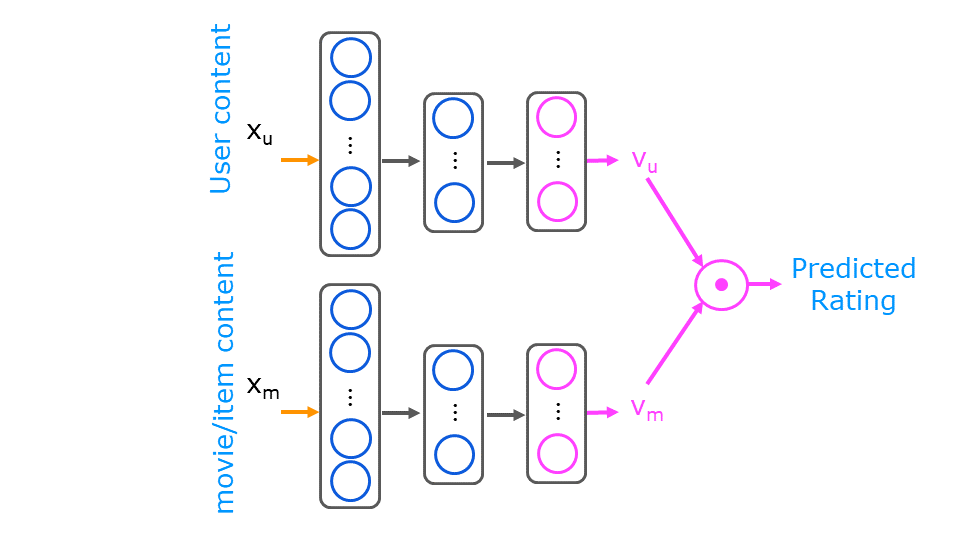

### Dados de treinamento
O conteúdo do filme fornecido à rede é uma combinação dos dados originais e alguns “recursos de engenharia”. Os recursos originais são o ano em que o filme foi lançado e o gênero do filme é apresentado como um vetor único. Existem 14 gêneros. O recurso projetado é uma classificação média derivada das avaliações do usuário. 

O conteúdo do usuário é composto por recursos de engenharia. Uma classificação média por gênero é calculada por usuário. Além disso, um ID de usuário, contagem de classificação e média de classificação estão disponíveis, mas não incluídos no conteúdo de treinamento ou previsão. Eles são transportados com o conjunto de dados porque são úteis na interpretação dos dados.

O conjunto de treinamento consiste em todas as avaliações feitas pelos usuários no conjunto de dados. Algumas classificações são repetidas para aumentar o número de exemplos de treinamento de gêneros sub-representados. O conjunto de treinamento é dividido em dois arrays com o mesmo número de entradas, um array de usuário e um array de filme/item.  

Abaixo, vamos carregar e exibir alguns dos dados.

In [6]:
def load_data():
    # Carregar dados de filmes e avaliações
    movies_df = pd.read_csv('../Downloads/ml-latest-small/ml-latest-small/movies.csv')
    ratings_df = pd.read_csv('../Downloads/ml-latest-small/ml-latest-small/ratings.csv')

    # Extrair ano e preparar gêneros
    movies_df['year'] = movies_df['title'].str.extract(r'(\(\d{4}\))')[0].str.replace('(', '').str.replace(')', '').astype(int, errors='ignore').fillna(2000).astype(int)
    movies_df['genres'] = movies_df['genres'].str.split('|')
    genre_list = sorted(set(g for sublist in movies_df['genres'] for g in sublist))
    genre_dict = {genre: i for i, genre in enumerate(genre_list)}
    
    # Vetores de gênero para cada filme
    movie_genres = np.zeros((len(movies_df), len(genre_list)))
    for idx, genres in enumerate(movies_df['genres']):
        for genre in genres:
            movie_genres[idx, genre_dict[genre]] = 1

    # Calcular média de avaliação para cada filme
    movie_ratings = ratings_df.groupby('movieId').rating.mean().to_dict()
    movies_df['ave_rating'] = movies_df['movieId'].map(movie_ratings).fillna(0)  # Substitua NaN com 0 para filmes sem avaliações

    # Mapa de IDs de filmes para índices
    movie_index = {id: idx for idx, id in enumerate(movies_df['movieId'])}
    
    # Preparar dados do usuário
    user_rating_counts = ratings_df.groupby('userId').size()
    user_rating_avgs = ratings_df.groupby('userId').rating.mean()
    user_index = {id: idx for idx, id in enumerate(user_rating_counts.index)}
    
    # Inicializar matriz de treinamento de usuário com tamanho baseado em usuários únicos
    user_train = np.zeros((len(user_index), 3 + len(genre_list)))  # userId, rating count, rating average, genre features

    for user_id, idx in user_index.items():
        user_train[idx, 0] = user_id
        user_train[idx, 1] = user_rating_counts[user_id]
        user_train[idx, 2] = user_rating_avgs[user_id]
    
    # Calcular preferências de gênero para cada usuário
    for _, row in ratings_df.iterrows():
        user_idx = user_index.get(row['userId'])
        movie_idx = movie_index.get(row['movieId'])
        if user_idx is not None and movie_idx is not None:
            user_train[user_idx, 3:] += movie_genres[movie_idx]
    
    # Normalizar preferências de gênero para cada usuário
    user_train[:, 3:] = np.divide(user_train[:, 3:], user_train[:, 1].reshape(-1, 1), out=np.zeros_like(user_train[:, 3:]), where=user_train[:, 1].reshape(-1, 1) != 0)

    # Alinhar avaliações com filmes e usuários
    aligned_item_features = []
    aligned_user_features = []
    y_train_list = []
    for _, row in ratings_df.iterrows():
        user_idx = user_index.get(row['userId'])
        movie_idx = movie_index.get(row['movieId'])
        if user_idx is not None and movie_idx is not None:
            aligned_user_features.append(user_train[user_idx])
            aligned_item_features.append(np.concatenate([movie_genres[movie_idx], [movies_df.loc[movie_idx, 'ave_rating']]]))
            y_train_list.append(row['rating'])
    
    item_features = movies_df[['movieId', 'year', 'ave_rating']].values
    
    return np.array(aligned_item_features), np.array(aligned_user_features), np.array(y_train_list), item_features, user_train, movie_genres, movies_df['title'].to_dict(), genre_list


In [7]:
# Carregar os dados
item_train, user_train, y_train, item_features, user_features, item_vecs, movie_dict, user_to_genre = load_data()

# Verificar as dimensões para treinamento
print(f"Dimensões de item_train: {item_train.shape}")
print(f"Dimensões de user_train: {user_train.shape}")
print(f"Tamanho de y_train: {len(y_train)}")
print(f"Dimensões de item_features: {item_features.shape}")
print(f"Dimensões de user_features: {user_features.shape}")
print(f"Dimensões de item_vecs: {item_vecs.shape}")
print(f"Exemplo de filme: {movie_dict[1]}")
print(f"Gêneros: {user_to_genre}")

Dimensões de item_train: (100836, 21)
Dimensões de user_train: (100836, 23)
Tamanho de y_train: 100836
Dimensões de item_features: (9742, 3)
Dimensões de user_features: (610, 23)
Dimensões de item_vecs: (9742, 20)
Exemplo de filme: Jumanji (1995)
Gêneros: ['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


### Saída da Função

- `item_train`: Características dos itens para o treinamento.
- `user_train`: Características dos usuários para o treinamento.
- `y_train`: Rótulos de treinamento (avaliações).
- `item_features`: Características dos itens.
- `user_features`: Características dos usuários.
- `item_vecs`: Vetores de gêneros dos filmes.
- `movie_dict`: Dicionário de títulos dos filmes.
- `user_to_genre`: Lista de gêneros.

### Verificação das Dimensões


**Dimensões de `item_train` (100836, 21)**:
   - `item_train` contém as características dos filmes usadas para treinamento.
   - 100836 é o número de avaliações.
   - 21 é o número de características por avaliação (20 gêneros + 1 média de avaliação do filme).

**Dimensões de `user_train` (100836, 23)**:
   - `user_train` contém as características dos usuários usadas para treinamento.
   - 100836 é o número de avaliações.
   - 23 é o número de características por avaliação (3 características principais + 20 gêneros).

**Tamanho de `y_train` (100836)**:
   - `y_train` contém as avaliações alvo para cada combinação usuário-filme.
   - 100836 é o número de avaliações.

**Dimensões de `item_features` (9742, 3)**:
   - `item_features` contém as características dos filmes.
   - 9742 é o número de filmes.
   - 3 é o número de características por filme (ID do filme, ano e média de avaliação).

**Dimensões de `user_features` (610, 23)**:
   - `user_features` contém as características agregadas dos usuários.
   - 610 é o número de usuários únicos.
   - 23 é o número de características por usuário (3 características principais + 20 gêneros).

**Dimensões de `item_vecs` (9742, 20)**:
   - `item_vecs` contém os vetores de gêneros dos filmes.
   - 9742 é o número de filmes.
   - 20 é o número de gêneros.

**Exemplo de filme**:
   - `movie_dict[1]` retorna o título do filme com ID 1, que é "Jumanji (1995)".

**Gêneros**:
   - `user_to_genre` contém a lista de gêneros de filmes.

In [8]:
def print_user_data(user_data, genre_list, max_rows=10):
    # Header da tabela
    header = ["user id", "rating count", "rating ave"] + genre_list
    header_string = "\t".join(header)
    print(header_string)
    
    # Formatar e imprimir cada linha de dados do usuário
    for i in range(min(max_rows, len(user_data))):
        # Preparar a linha para ser impressa
        row = [i + 1]  # Adicionando o índice do usuário como ID
        row += [int(user_data[i, 0]), int(user_data[i, 1]), round(user_data[i, 2], 1)]  # Contagem e média de avaliações
        row += [round(r, 1) for r in user_data[i, 3:]]  # Gêneros
        
        row_string = "\t".join(map(str, row))
        print(row_string)

In [9]:
print("Dados do Usuário:")
print_user_data(user_features, user_to_genre)

Dados do Usuário:
user id	rating count	rating ave	(no genres listed)	Action	Adventure	Animation	Children	Comedy	Crime	Documentary	Drama	Fantasy	Film-Noir	Horror	IMAX	Musical	Mystery	Romance	Sci-Fi	Thriller	War	Western
1	1	232	4.4	0.0	0.4	0.4	0.1	0.2	0.4	0.2	0.0	0.3	0.2	0.0	0.1	0.0	0.1	0.1	0.1	0.2	0.2	0.1	0.0
2	2	29	3.9	0.0	0.4	0.1	0.0	0.0	0.2	0.3	0.1	0.6	0.0	0.0	0.0	0.1	0.0	0.1	0.0	0.1	0.3	0.0	0.0
3	3	39	2.4	0.0	0.4	0.3	0.1	0.1	0.2	0.1	0.0	0.4	0.1	0.0	0.2	0.0	0.0	0.0	0.1	0.4	0.2	0.1	0.0
4	4	216	3.6	0.0	0.1	0.1	0.0	0.0	0.5	0.1	0.0	0.6	0.1	0.0	0.0	0.0	0.1	0.1	0.3	0.1	0.2	0.0	0.0
5	5	44	3.6	0.0	0.2	0.2	0.1	0.2	0.3	0.3	0.0	0.6	0.2	0.0	0.0	0.1	0.1	0.0	0.2	0.0	0.2	0.1	0.0
6	6	314	3.5	0.0	0.2	0.1	0.0	0.1	0.4	0.1	0.0	0.4	0.1	0.0	0.1	0.0	0.0	0.0	0.2	0.1	0.2	0.0	0.0
7	7	152	3.2	0.0	0.4	0.4	0.1	0.1	0.3	0.2	0.0	0.4	0.2	0.0	0.0	0.1	0.1	0.1	0.2	0.3	0.3	0.1	0.0
8	8	47	3.6	0.0	0.3	0.2	0.0	0.1	0.5	0.2	0.0	0.4	0.1	0.0	0.0	0.0	0.0	0.1	0.3	0.1	0.3	0.1	0.0
9	9	46	3.3	0.0	0.2	0.2	0.0	0.0	0.3	0.2	0.0	0.5	0.0

In [10]:
def display_movie_data(item_data, movie_genres, genre_list, max_rows=5):
    # Header da tabela
    header = ["movie id", "year", "ave rating"] + genre_list
    header_string = "\t".join(header)
    print(header_string)
    
    # Formatar e imprimir cada linha de dados do filme
    for i in range(min(max_rows, len(item_data))):
        # Extrair os dados do filme relevantes
        movie_id = int(item_data[i, 0])
        year = int(item_data[i, 1])
        ave_rating = item_data[i, 2]
        genres = movie_genres[i]  # Acesso direto aos dados de gênero corretos
        
        # Garantir que os valores de gênero sejam 0 ou 1
        genres = [1 if g > 0 else 0 for g in genres]

        # Preparar a linha para ser impressa
        row = [movie_id, year, round(ave_rating, 1)] + genres
        row_string = "\t".join(map(str, row))
        print(row_string)

In [11]:
# Exibir os dados do filme
display_movie_data(item_features, item_train, user_to_genre, max_rows=5)

movie id	year	ave rating	(no genres listed)	Action	Adventure	Animation	Children	Comedy	Crime	Documentary	Drama	Fantasy	Film-Noir	Horror	IMAX	Musical	Mystery	Romance	Sci-Fi	Thriller	War	Western
1	1995	3.9	0	0	1	1	1	1	0	0	0	1	0	0	0	0	0	0	0	0	0	0	1
2	1995	3.4	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	1	0	0	0	0	1
3	1995	3.3	0	1	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	1	0	0	1
4	1995	2.4	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	1	0	0	1
5	1995	3.1	0	0	0	0	0	0	1	0	0	0	0	0	0	0	1	0	0	1	0	0	1


In [12]:
print(f"y_train[:5]: {y_train[:5]}")

y_train[:5]: [4. 4. 4. 5. 5.]


O alvo, y, é a classificação do filme dada pelo usuário.

### Preparação dos dados de treinamento
Vamos escalar as características de entrada usando o [StandardScaler do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Abaixo, a transformação inversa também é mostrada para produzir as entradas originais. Vamos escalar as avaliações alvo usando um Min Max Scaler, que escala o alvo para estar entre -1 e 1. [MinMaxScaler do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)


In [16]:
# Dados de treinamento antes do escalonamento
item_train_nao_escalado = item_train.copy()
user_train_nao_escalado = user_train.copy()
y_train_nao_escalado = y_train.copy()

# Shape
print(f"item_train_nao_escalado: {item_train_nao_escalado.shape}")
print(f"user_train_nao_escalado: {user_train_nao_escalado.shape}")
print(f"y_train_nao_escalado: {y_train_nao_escalado.shape}")

item_train_nao_escalado: (100836, 21)
user_train_nao_escalado: (100836, 23)
y_train_nao_escalado: (100836, 1)


In [17]:
# Escalonador para os itens
escalonadorItem = StandardScaler()
escalonadorItem.fit(item_train)
item_train = escalonadorItem.transform(item_train)

# Escalonador para os usuários
escalonadorUsuario = StandardScaler()
escalonadorUsuario.fit(user_train)
user_train = escalonadorUsuario.transform(user_train)

# Escalonador para as avaliações alvo
escalonadorAlvo = MinMaxScaler((-1, 1))
escalonadorAlvo.fit(y_train.reshape(-1, 1))
y_train = escalonadorAlvo.transform(y_train.reshape(-1, 1))
#y_test = escalonadorAlvo.transform(y_test.reshape(-1, 1))

# Verificar se os dados não escalados são recuperados corretamente após a inversão do escalonamento
item_train_recuperado = escalonadorItem.inverse_transform(item_train)
user_train_recuperado = escalonadorUsuario.inverse_transform(user_train)

# Comparar os dados recuperados dos conjuntos de treinamento com os dados não escalados originais
print(np.allclose(item_train_nao_escalado, item_train_recuperado))
print(np.allclose(user_train_nao_escalado, user_train_recuperado))

True
True


Os dados escalonados e embaralhados agora têm média zero.

**Verificar se os dados não escalados são recuperados corretamente**:
    - Usa `np.allclose` para verificar se os dados não escalados (`item_train_nao_escalado` e `user_train_nao_escalado`) são aproximadamente iguais aos dados transformados de volta para a escala original usando `inverse_transform`.
    - `inverse_transform` reverte o processo de `transform`, retornando os dados à sua escala original.
    - `np.allclose` compara os arrays e retorna `True` se todos os elementos forem aproximadamente iguais, considerando uma pequena tolerância.


In [18]:
# Dividir o conjunto de dados dos itens em conjuntos de treinamento e teste
item_train, item_test = train_test_split(item_train_nao_escalado, train_size=0.80, shuffle=True, random_state=1)

# Dividir o conjunto de dados dos usuários em conjuntos de treinamento e teste
user_train, user_test = train_test_split(user_train_nao_escalado, train_size=0.80, shuffle=True, random_state=1)

# Dividir o conjunto de dados das avaliações (target) em conjuntos de treinamento e teste
y_train, y_test = train_test_split(y_train_nao_escalado, train_size=0.80, shuffle=True, random_state=1)

# Shape
print(f"item_train: {item_train.shape}")
print(f"item_test: {item_test.shape}")
print(f"user_train: {user_train.shape}")
print(f"user_test: {user_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

item_train: (80668, 21)
item_test: (20168, 21)
user_train: (80668, 23)
user_test: (20168, 23)
y_train: (80668, 1)
y_test: (20168, 1)


## Rede Neural para filtragem baseada em conteúdo
Agora, vamos construir uma rede neural. Terá duas redes combinadas por um produto escalar. Neste exemplo, eles serão idênticos. Observe que essas redes não precisam ser iguais. Se o conteúdo do usuário for substancialmente maior que o conteúdo do filme, você poderá optar por aumentar a complexidade da rede do usuário em relação à rede do filme. Nesse caso, o conteúdo é semelhante, portanto as redes são iguais.

In [19]:
# Definindo o número de saídas para as camadas finais das sub-redes
num_outputs = 32
tf.random.set_seed(1)

# Construir a sub-rede neural para usuários
user_NN = tf.keras.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=num_outputs, activation='linear')
])

# Construir a sub-rede neural para itens
item_NN = tf.keras.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=num_outputs, activation='linear')
])

# Criar a entrada para a rede de usuários
input_user = tf.keras.layers.Input(shape=(user_train.shape[1]) - 3) # remove userId, rating count, rating average
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# Criar a entrada para a rede de itens
input_item = tf.keras.layers.Input(shape=(item_train.shape[1]) - 1) # remove movieId
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# Calcular o produto escalar dos dois vetores, vu e vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# Especificar as entradas e saída do modelo
model = tf.keras.Model([input_user, input_item], output)

# Mostrar um resumo do modelo construído
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 sequential (Sequential)        (None, 32)           42400       ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 32)           42400       ['input_2[0][0]']                
                                                                                              

In [20]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=cost_fn)

In [21]:
tf.random.set_seed(1)
model.fit([user_train[:, 3:], item_train[:, 1:]], y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
2521/2521 - 7s - loss: 0.1466 - 7s/epoch - 3ms/step
Epoch 2/10
2521/2521 - 7s - loss: 0.1365 - 7s/epoch - 3ms/step
Epoch 3/10
2521/2521 - 7s - loss: 0.1314 - 7s/epoch - 3ms/step
Epoch 4/10
2521/2521 - 7s - loss: 0.1279 - 7s/epoch - 3ms/step
Epoch 5/10
2521/2521 - 7s - loss: 0.1256 - 7s/epoch - 3ms/step
Epoch 6/10
2521/2521 - 6s - loss: 0.1239 - 6s/epoch - 3ms/step
Epoch 7/10
2521/2521 - 7s - loss: 0.1226 - 7s/epoch - 3ms/step
Epoch 8/10
2521/2521 - 7s - loss: 0.1212 - 7s/epoch - 3ms/step
Epoch 9/10
2521/2521 - 7s - loss: 0.1201 - 7s/epoch - 3ms/step
Epoch 10/10
2521/2521 - 7s - loss: 0.1193 - 7s/epoch - 3ms/step


In [22]:
model.evaluate([user_test[:, 3:], item_test[:, 1:]], y_test)

631/631 [==============================] - 2s 2ms/step - loss: 0.1226


0.12255270779132843

É comparável à perda de treinamento, indicando que o modelo não superajustou substancialmente os dados de treinamento.

### Previsões para um novo usuário
Primeiro, criaremos um novo usuário e faremos com que o modelo sugira filmes para esse usuário.

In [31]:
new_user_id = 50000
new_rating_ave = 0.0
new_action = 0.0
new_adventure = 5.0
new_animation = 2.0
new_childrens = 0.0
new_comedy = 0.0
new_crime = 0.0
new_documentary = 0.0
new_drama = 0.0
new_fantasy = 5.0
new_horror = 0.0
new_mystery = 0.0
new_romance = 0.0
new_scifi = 3.0
new_thriller = 0.0
new_rating_count = 4

# Assegure-se de que todos os gêneros estão representados no vetor
genre_order = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'] 

# Inicializar todos os gêneros com 0 e substituir os que são de interesse
genres = np.zeros(len(genre_order))
genres[genre_order.index('Adventure')] = new_adventure
genres[genre_order.index('Fantasy')] = new_fantasy
genres[genre_order.index('Sci-Fi')] = new_scifi
genres[genre_order.index('Animation')] = new_animation

# Combinar todas as informações no vetor do usuário
user_vec = np.array([[new_user_id, new_rating_count, new_rating_ave] + genres.tolist()])


print(f"Shape do vetor de usuário ajustado: {user_vec.shape}")

Shape do vetor de usuário ajustado: (1, 20)


O novo usuário gosta de filmes dos gêneros aventura e fantasia. Vamos encontrar os filmes mais bem avaliados para o novo usuário.  
Abaixo, usaremos um conjunto de vetores de filme/item, `item_vecs` que possui um vetor para cada filme no conjunto de treinamento/teste. Isso é combinado com o novo vetor do usuário acima e os vetores dimensionados são usados ​​para prever as classificações de todos os filmes.

In [24]:
def gen_user_vecs(user_vec, num_items):
    """
    Gera um vetor de características para um usuário e replica esse vetor para corresponder
    ao número de itens (filmes) no dataset.
    
    Args:
    user_vec (np.array): Vetor de características do usuário.
    num_items (int): Número de itens (filmes) para os quais o vetor de características deve ser replicado.
    
    Returns:
    np.array: Um array replicado do vetor de características do usuário.
    """
    # Replicar o vetor user_features para cada filme
    user_vecs = np.tile(user_vec, (num_items, 1))
    
    return user_vecs

In [35]:
def print_pred_movies(y_pred, item_vectors, movie_dict, movie_genres, movie_ratings, genre_list, maxcount=10):
    # Cabeçalho para exibição dos resultados
    print(f"{'Pred':<6} {'Movie ID':<9} {'Ave Rating':<12} {'Title':<50} {'Genres'}")
    
    # Contador para limitar o número de resultados exibidos
    count = 0

    for i in range(len(y_pred)):
        if count >= maxcount:
            break

        movie_id = int(item_vectors[i, 0])  # Assume que o ID do filme está na primeira coluna do vetor do item
        movie_title = movie_dict.get(movie_id, "Unknown Movie ID")
        ave_rating = movie_ratings.get(movie_id, 0)
        genre_vector = movie_genres[movie_id]
        genres = '|'.join([genre_list[idx] for idx, g in enumerate(genre_vector) if g == 1])

        # Formatar e exibir a linha com informações do filme
        print(f"{y_pred[i][0]:.2f}\t{movie_id:<9}\t{ave_rating:<12.1f} {movie_title[:50]:<50} {genres}")

        # Incrementar o contador de filmes exibidos
        count += 1


In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Escalonadores
scalerUser = StandardScaler()
scalerItem = StandardScaler()
scalerTarget = MinMaxScaler(feature_range=(-1, 1))

# Replicar o vetor do usuário para cada filme
user_vecs = np.tile(user_vec, (len(item_vecs), 1))

# Ajustar os escalonadores aos dados
scalerUser.fit(user_vecs)  # Ajustar ao vetor do usuário replicado
scalerItem.fit(item_vecs)  # Ajustar aos vetores dos itens

# Importante: Ajustar o escalonador de target ao y_train
scalerTarget.fit(y_train.reshape(-1, 1))

# Escalonar os vetores do usuário e dos itens
suser_vecs = scalerUser.transform(user_vecs)
sitem_vecs = scalerItem.transform(item_vecs)

# Fazer a previsão
y_p = model.predict([suser_vecs, sitem_vecs])

# Desescalonar a previsão de y
y_pu = scalerTarget.inverse_transform(y_p)

# Ordenar os resultados, previsão mais alta primeiro
sorted_index = np.argsort(-y_pu,axis=0).reshape(-1).tolist() 
sorted_ypu = y_pu[sorted_index]
sorted_items = item_vecs[sorted_index]

movie_ratings = {movie_id: ave_rating for movie_id, ave_rating in zip(item_vecs[:, 0], item_vecs[:, 2])}
genre_list = genre_order

# Imprimir os filmes preditos e suas avaliações
print_pred_movies(sorted_ypu, sorted_items, movie_dict, item_vecs, movie_ratings, genre_list, maxcount=10)

305/305 [==============================] - 1s 2ms/step
Pred   Movie ID  Ave Rating   Title                                              Genres
0.81	0        	0.0          Toy Story (1995)                                   Animation|Children|Comedy|Crime|Horror
0.80	0        	0.0          Toy Story (1995)                                   Animation|Children|Comedy|Crime|Horror
0.80	0        	0.0          Toy Story (1995)                                   Animation|Children|Comedy|Crime|Horror
0.79	0        	0.0          Toy Story (1995)                                   Animation|Children|Comedy|Crime|Horror
0.79	0        	0.0          Toy Story (1995)                                   Animation|Children|Comedy|Crime|Horror
0.79	0        	0.0          Toy Story (1995)                                   Animation|Children|Comedy|Crime|Horror
0.79	0        	0.0          Toy Story (1995)                                   Animation|Children|Comedy|Crime|Horror
0.79	0        	0.0          Toy

# Reduzindo o número de recursos

A análise de componentes principais (PCA) é uma técnica valiosa na área de aprendizado de máquina não supervisionado, frequentemente usada para reduzir a dimensionalidade dos dados enquanto preserva o máximo de informação possível. Essa técnica é particularmente útil em contextos onde os conjuntos de dados possuem um grande número de variáveis, facilitando assim a visualização e análise dos dados.

### Funcionamento e Aplicações do PCA

#### **Redução de Dimensionalidade**
O PCA transforma um conjunto de variáveis possivelmente correlacionadas em um conjunto de valores de variáveis que são linearmente descorrelacionadas, chamadas de componentes principais. O primeiro componente principal possui a maior variância possível (ou seja, conta a maior parte da variação nos dados), e cada componente subsequente, em ordem, tem a maior variância possível sob a restrição de que seja ortogonal aos componentes anteriores.

#### **Visualização de Dados**
Em muitos casos, como em conjuntos de dados com muitas variáveis, não é possível realizar uma análise exploratória de dados eficaz utilizando todas as variáveis devido à complexidade e à dificuldade de interpretação. O PCA permite reduzir essas dimensões a apenas duas ou três, facilitando a criação de gráficos e ajudando os cientistas de dados a identificar padrões ou agrupamentos ocultos eficientemente.

### Exemplo Prático: Análise de Características de Carros

**Contexto**: Suponha que você tenha dados sobre características de carros, incluindo o comprimento (x_1) e a largura (x_2) dos veículos. Essas duas dimensões, embora importantes, podem apresentar diferentes graus de variabilidade.

**Aplicação do PCA**:
- **Variabilidade Reduzida**: Em muitos países, a largura dos carros varia menos devido às normas de largura das estradas. Portanto, a largura (x_2) pode ter uma variação menor em comparação com o comprimento (x_1), que pode variar significativamente dependendo do tipo de carro.
- **Seleção de Características**: Ao aplicar PCA a um conjunto de dados como esse, o algoritmo poderia identificar que o comprimento do carro (x_1) é o componente principal devido à sua maior variabilidade. Isso sugere que o comprimento pode ser uma característica mais discriminante para análise neste contexto.

**Vantagens do Uso do PCA**:
- **Simplificação de Dados**: Ao focar em menos características que retêm a maior parte da informação dos dados originais, o PCA simplifica a análise sem perder insights significativos.
- **Eficiência Computacional**: Reduzir o número de variáveis pode diminuir significativamente o tempo e os recursos computacionais necessários para análises subsequentes.

### Utilização do PCA em Dados Complexos

#### **Visualização de Dados Multidimensionais**
Imagine um conjunto de dados onde cada carro é descrito por seu comprimento (x_1) e altura (x_2). Ambas as dimensões variam significativamente, indicando que diferentes tipos de carros têm tamanhos distintos. Ao plotar esses dados, percebe-se uma tendência: carros maiores tendem a ser tanto mais longos quanto mais altos.

#### **Criação de um Novo Eixo (Z)**
Em vez de escolher entre comprimento e altura, o PCA permite a criação de um novo eixo, denominado eixo z, que é uma combinação linear de x_1 e x_2. Este novo eixo não se projeta fora do plano formado por x_1 e x_2, mas sim se alinha de maneira que capte a variância máxima dos dados dentro desse plano. O eixo z pode ser visto como uma medida da "grandeza" geral do carro, combinando comprimento e altura de forma que maximize a informação capturada por essa única dimensão.

#### **Interpretação do Eixo Z**
No eixo z, um valor alto pode indicar um carro grande (tanto longo quanto alto), enquanto um valor baixo pode indicar um carro menor. Essa nova métrica oferece uma visão simplificada, mas abrangente, das dimensões físicas dos carros, permitindo análises e visualizações mais eficientes em um espaço reduzido.

### Implementação Prática do PCA

1. **Seleção de Componentes**: Determinar quantos componentes principais são necessários para capturar a essência dos dados sem perder informações críticas. Em muitos casos, reduzir para dois ou três componentes é suficiente para visualização em 2D ou 3D.
   
2. **Transformação dos Dados**: Aplicar o PCA para transformar as variáveis originais (x_1, x_2) nas principais componentes (z). Essa transformação é calculada de modo que o primeiro componente principal capture a maior variante possível, e cada componente subsequente capture a máxima variante remanescente sob a condição de ser ortogonal aos anteriores.

3. **Visualização**: Usar os componentes principais para plotar os dados, facilitando a identificação de padrões, agrupamentos ou outliers que podem não ser visíveis no espaço de dimensão superior.

### PCA em Dados Tridimensionais

Imagine um conjunto de dados tridimensional onde, visualmente, os pontos parecem estar distribuídos ao longo de uma superfície plana, ou "panqueca", como descrito no exemplo. Mesmo que os dados existam em um espaço tridimensional, a maior parte da variação pode ser capturada em apenas duas dimensões. O PCA permite identificar essas duas principais componentes (Z_1 e Z_2) que melhor representam a variação nos dados:

- **Redução de Dimensões**: Ao aplicar PCA a dados tridimensionais que naturalmente se alinham em um plano, podemos reduzi-los para duas dimensões. Isso simplifica a visualização sem perder informações significativas sobre a estrutura dos dados.
- **Visualização Simplificada**: Reduzir para duas dimensões facilita a apresentação dos dados em formatos estáticos, como em papel ou numa tela de computador, sem a necessidade de manipulações dinâmicas para entender a distribuição dos dados.

### PCA na Análise Socioeconômica de Países

Em estudos socioeconômicos, onde cada país pode ser descrito por múltiplas variáveis como PIB, PIB per capita, Índice de Desenvolvimento Humano (IDH) e expectativa de vida, o PCA é particularmente útil:

- **Interpretação das Componentes**: Após a aplicação do PCA, pode-se descobrir que a primeira componente principal (Z_1) captura aspectos relacionados ao tamanho econômico total do país (como o PIB total), enquanto a segunda componente (Z_2) pode estar mais relacionada à riqueza ou qualidade de vida per capita.
- **Visualização de Dados Complexos**: Com o PCA, é possível plotar os países em um gráfico de duas dimensões, onde os eixos representam essas componentes econômicas fundamentais, proporcionando insights rápidos sobre como os países se comparam em termos de tamanho econômico e prosperidade individual.

### Vantagens da Visualização com PCA

- **Descoberta de Padrões**: Visualizar dados reduzidos por PCA pode revelar agrupamentos, outliers ou tendências que não são óbvios em representações de alta dimensão.
- **Análise Exploratória**: Especialmente em estágios iniciais de análise de dados, visualizar as principais componentes ajuda a formular hipóteses sobre relações subjacentes ou identificar áreas para investigação detalhada.

# Algoritmo PCA

### Como o PCA Funciona?

#### **Normalização dos Dados**
Antes de aplicar o PCA, é crucial normalizar os dados para que tenham média zero. Isso é feito subtraindo a média de cada característica do respectivo valor de cada amostra. Além disso, se as características apresentam escalas muito diferentes, é aconselhável normalizar as escalas (por exemplo, usando a normalização por desvio padrão) para garantir que uma característica não domine a análise devido apenas à sua escala.

#### **Escolha do Novo Eixo (Z)**
O objetivo do PCA é identificar a direção (ou direções) na qual os dados são mais dispersos. Essas direções tornam-se os novos eixos (componentes principais) que tentam capturar as variações significativas nos dados.

1. **Cálculo da Covariância**: Primeiramente, calcula-se a matriz de covariância dos dados normalizados. Esta matriz ajuda a entender como as variáveis ​​interagem entre si.
   
2. **Decomposição de Eigen**: Em seguida, calculam-se os autovalores e autovetores da matriz de covariância. Os autovetores indicam a direção dos novos eixos, e os autovalores indicam a quantidade de variação capturada por cada eixo.

3. **Seleção dos Componentes Principais**: Os autovetores são então ordenados por seus autovalores correspondentes, em ordem decrescente. Os primeiros autovetores são os que capturam a maior parte da variância nos dados e são selecionados como os componentes principais.

#### **Projeção nos Novos Eixos**
Uma vez identificados os componentes principais, os dados originais são projetados sobre esses novos eixos. Esta projeção transforma os dados do espaço original para um novo espaço com menos dimensões.

- **Exemplo Visual**: Se considerarmos um conjunto de dados com duas características (x_1, x_2), o PCA pode revelar que um novo eixo z (uma combinação linear de x_1 e x_2) captura uma quantidade significativa de informação. Projetar os dados neste eixo z nos permite visualizar a estrutura dos dados de maneira simplificada e eficaz.

### Benefícios do PCA

- **Redução de Dimensionalidade**: O PCA permite uma redução eficaz da quantidade de variáveis, concentrando-se nas mais informativas.
- **Visualização Aprimorada**: Reduzir para duas ou três dimensões facilita a visualização de padrões complexos em grandes conjuntos de dados.
- **Preparação para Outras Análises**: Dados de menor dimensionalidade reduzem a complexidade computacional e podem melhorar o desempenho de algoritmos de aprendizado de máquina.

### Escolha do Eixo Z no PCA

#### **Visualizando a Importância da Escolha do Eixo**
Ao aplicar o PCA, não qualquer eixo serve. A seleção do eixo onde os dados serão projetados afeta diretamente a qualidade da representação reduzida:

- **Eixo com Baixa Variância**: Se escolhermos um eixo que compacta demais os dados, como no segundo exemplo, onde os pontos projetados estão muito próximos uns dos outros, perdemos muita informação. Isso acontece porque a variação entre os pontos, que captura a diversidade dos dados, é minimizada. Portanto, esse eixo representa mal a estrutura original do conjunto de dados.

- **Eixo com Alta Variância**: Uma escolha ideal para o eixo z é aquela que maximiza a dispersão (variação) dos pontos projetados, como no último exemplo mostrado. Quando os pontos projetados estão mais distantes uns dos outros, isso indica que o eixo escolhido está capturando uma quantidade significativa da variação original dos dados. Esse eixo é conhecido como o primeiro componente principal.

#### **Componente Principal**
No PCA, o primeiro componente principal é o eixo que, quando os dados são projetados sobre ele, resulta na maior variação possível. Isso significa que esse eixo está capturando a maior parte da informação contida nos dados originais, reduzindo a perda de informações durante o processo de redução de dimensionalidade.

#### **Demonstração Visual Interativa**
Utilizando uma ferramenta interativa, como a mostrada no exemplo, onde se pode ajustar o ângulo do eixo z e observar a projeção dos dados, é possível visualizar como diferentes escolhas do eixo afetam a variação dos pontos projetados. Quando o eixo está alinhado de maneira que os pontos projetados apresentam a maior dispersão possível, encontramos o componente principal.

### Significado do PCA na Prática

O PCA é mais do que apenas uma ferramenta de redução de dimensionalidade; ele permite uma análise mais profunda dos dados, revelando padrões ocultos e facilitando descobertas que poderiam ser complicadas em espaços de alta dimensão. Ao identificar os componentes principais, os analistas podem focar nas variáveis mais informativas, simplificando análises subsequentes e tomando decisões baseadas em uma compreensão mais clara dos dados.

### Projeção no PCA

#### **Cálculo da Projeção**
O processo de projeção em PCA envolve calcular o produto escalar entre o vetor de dados e o vetor que define o componente principal. No exemplo dado, o vetor de dados é (2,3) e o primeiro componente principal tem coordenadas aproximadas (0.71, 0.71). O produto escalar é calculado como:

$$ \text{Projeção} = 2 \times 0.71 + 3 \times 0.71 = 3.55 $$

Essa projeção de 3.55 no eixo z (primeiro componente principal) é a representação unidimensional do ponto original no espaço bidimensional, capturando a essência das variações dos dados ao longo desse eixo.

#### **Significado da Projeção**
A projeção de 3.55 indica que o ponto original (2,3) tem uma "distância" de 3.55 do origem, ao longo do eixo do primeiro componente principal. Este valor unidimensional tenta encapsular as informações mais significativas do ponto original, reduzindo a redundância e simplificando a complexidade dos dados.

### Componentes Principais Adicionais

#### **Escolha de Componentes Adicionais**
Se mais dimensões forem necessárias para capturar mais variação nos dados, o PCA pode identificar componentes adicionais. Esses componentes são sempre ortogonais (perpendiculares) entre si, garantindo que cada novo componente capture uma nova direção de máxima variação nos dados que não foi capturada pelos componentes anteriores.

- **Segundo Componente Principal**: Se um segundo componente é necessário, ele será escolhido para ser perpendicular ao primeiro. Isso significa que ele capturará a variação nos dados que não está alinhada com o primeiro componente.

- **Componentes Subsequentes**: Da mesma forma, um terceiro componente seria perpendicular aos dois primeiros, e assim por diante, cada um capturando máxima variação residual nos dados.

#### **Visualização e Interpretação**
A escolha de múltiplos componentes principais permite visualizar e analisar os dados em múltiplas dimensões reduzidas, cada uma oferecendo perspectivas distintas sobre as características dos dados. Por exemplo, em um espaço tridimensional, os três primeiros componentes principais podem fornecer uma visão abrangente das relações complexas nos dados.

### Diferenças Fundamentais Entre PCA e Regressão Linear

#### **Natureza dos Dados**
- **Regressão Linear**: É um método de aprendizado supervisionado que requer uma variável dependente (y) e uma ou mais variáveis independentes (x). O objetivo é prever os valores de y a partir dos valores de x, minimizando o erro entre as previsões e os valores reais.
- **PCA**: É uma técnica de aprendizado não supervisionado que não utiliza variáveis dependentes. Em vez disso, trabalha com um conjunto de variáveis (X1, X2, ..., Xn) que são tratadas igualmente para identificar padrões e reduzir a dimensionalidade dos dados.

#### **Objetivo da Análise**
- **Regressão Linear**: O objetivo é ajustar a melhor linha (ou superfície, em dimensões maiores) que modela a relação entre as variáveis dependentes e independentes. Isso é feito minimizando a distância vertical (resíduos) entre os dados reais e a linha ajustada.
- **PCA**: O objetivo é encontrar um ou mais eixos ortogonais (componentes principais) que maximizem a variância dos dados projetados. Isso ajuda a capturar a essência dos dados com menos variáveis, preservando o máximo de informação possível.

#### **Direção dos Componentes**
- **Regressão Linear**: A linha ajustada depende apenas da relação entre y e as variáveis x.
- **PCA**: Os componentes principais são escolhidos com base na direção onde os dados são mais dispersos, independentemente de qualquer relação de dependência externa. Cada novo componente é ortogonal aos anteriores, garantindo que diferentes aspectos dos dados sejam capturados.

### Projeção e Reconstrução em PCA

#### **Projeção**
A projeção em PCA envolve calcular o produto escalar entre o vetor de dados e o vetor que define o primeiro componente principal. Essa projeção transforma dados multidimensionais em uma dimensão reduzida, mantendo a maior variância possível.

#### **Reconstrução**
A reconstrução é o processo de tentar reverter os dados projetados de volta ao seu espaço original utilizando apenas as dimensões retidas. Embora a reconstrução não recupere os dados originais exatamente (a menos que todos os componentes sejam retidos), ela proporciona uma aproximação baseada nas dimensões mais informativas. No exemplo dado, usando o valor projetado (Z = 3.55), a reconstrução é uma aproximação razoável do ponto original, mostrando como a PCA pode eficientemente resumir informações sem grandes perdas.

# Código PCA

A implementação da Análise de Componentes Principais (PCA) utilizando a biblioteca scikit-learn pode ser uma ferramenta poderosa para análise de dados, especialmente quando se deseja reduzir a dimensionalidade de um conjunto de dados mantendo o máximo de informação possível. Aqui está uma visão geral de como aplicar PCA em seus dados usando scikit-learn, detalhando cada etapa do processo.

### Etapas para Implementar PCA com Scikit-learn

#### **Pré-processamento dos Dados**
Antes de aplicar o PCA, é essencial que todos os recursos (features) estejam na mesma escala. Isso é particularmente importante quando os dados envolvem variáveis com grandes diferenças em suas escalas de valores, como o PIB (em trilhões) e outras métricas econômicas que podem ter valores muito menores. A normalização ou padronização dos recursos garante que o PCA não seja indevidamente influenciado pela magnitude de qualquer característica.

#### **Aplicação do PCA**
Utilizando a função `fit` do PCA no scikit-learn, você pode "ajustar" seus dados ao modelo PCA para extrair os componentes principais. Este método automaticamente realiza a normalização das médias (subtraindo a média de cada característica), portanto, você não precisa realizar essa etapa separadamente.

- **Seleção dos Componentes Principais**: Ao executar o PCA, você especifica o número de componentes principais que deseja extrair, como dois ou três, se estiver interessado em visualizações 2D ou 3D. Para aplicações que requerem uma redução maior da dimensionalidade, você pode optar por um número maior de componentes.

#### **Análise da Variância Explicada**
Após ajustar o PCA, é útil examinar a proporção da variância explicada por cada componente principal. Isso é feito através da função `explained_variance_ratio_`, que fornece uma visão clara de quanto da informação original é retida em cada componente principal. Essa análise pode ajudar a decidir quantos componentes são necessários para capturar a essência dos seus dados sem perder informações críticas.

#### **Transformação dos Dados**
Com os componentes principais determinados, você pode então projetar seus dados originais nesses novos eixos usando o método `transform`. Isso reduz a dimensionalidade dos seus dados para o número de componentes principais que você escolheu, resultando em cada exemplo de treinamento sendo representado por apenas dois ou três valores numéricos.

#### **Visualização dos Dados**
Finalmente, os valores transformados podem ser visualizados em um gráfico 2D ou 3D. Essa visualização pode revelar padrões, clusters ou outliers que não eram aparentes nos dados de alta dimensionalidade, facilitando a interpretação e a análise subsequentes.

### Passo a Passo para Implementar PCA com Scikit-learn

1. **Preparação dos Dados**
   - Primeiramente, você define seu conjunto de dados `X`, que aqui é composto por seis exemplos com duas características cada (X_1 e X_2).
   - Exemplo de código para definir `X`:
     ```python
     import numpy as np
     X = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6]])
     ```

2. **Configuração do PCA**
   - Utilize o PCA do scikit-learn especificando o número de componentes principais desejados. No exemplo dado, queremos reduzir os dados a apenas uma dimensão (`n_components=1`).
   - Exemplo de código para configurar e ajustar o PCA:
     ```python
     from sklearn.decomposition import PCA
     pca_1 = PCA(n_components=1)
     pca_1.fit(X)
     ```

3. **Análise da Variância Explicada**
   - Após ajustar o PCA, você pode verificar quanta variância dos dados originais é explicada pelo componente principal. Isso é feito acessando o atributo `explained_variance_ratio_`.
   - Exemplo de código para verificar a variância explicada:
     ```python
     print(pca_1.explained_variance_ratio_)
     ```

4. **Transformação dos Dados**
   - Com o modelo PCA ajustado, você pode transformar seus dados originais para refletir as novas dimensões (componentes principais). Isso reduzirá cada exemplo a um único número no novo eixo Z.
   - Exemplo de código para transformar os dados:
     ```python
     transformed_data = pca_1.transform(X)
     print(transformed_data)
     ```

5. **Visualização e Interpretação**
   - Os dados transformados agora podem ser visualizados ou utilizados para análises adicionais. Cada ponto nos dados originais é projetado no eixo Z, capturando a essência dos dados com menos ruído ou redundância.

### Extensão para Dois Componentes Principais

Se você configurar o PCA para extrair dois componentes principais de dados bidimensionais (`n_components=2`), cada ponto será projetado em dois novos eixos, Z_1 e Z_2, capturando 100% da variância original dos dados.

- **Configuração para dois componentes**:
  ```python
  pca_2 = PCA(n_components=2)
  pca_2.fit(X)
  print(pca_2.explained_variance_ratio_)
  transformed_data_2 = pca_2.transform(X)
  print(transformed_data_2)
  ```